# Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,precision_recall_curve, roc_curve

In [2]:
app_train = pd.read_csv("application_train.csv")
bureau = pd.read_csv("bureau.csv")
bureau_balance = pd.read_csv("bureau_balance.csv")
credit_card_balance = pd.read_csv("credit_card_balance.csv")
installments_payments = pd.read_csv("installments_payments.csv")
POS_CASH_balance = pd.read_csv("POS_CASH_balance.csv")
HomeCredit_columns_description = pd.read_csv("HomeCredit_columns_description.csv",encoding='Latin-1')

In [3]:
homecredit_df = pd.DataFrame(HomeCredit_columns_description)
print(homecredit_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   219 non-null    int64 
 1   Table        219 non-null    object
 2   Row          219 non-null    object
 3   Description  219 non-null    object
 4   Special      86 non-null     object
dtypes: int64(1), object(4)
memory usage: 8.7+ KB
None


## Application train

In [4]:
app_train = pd.read_csv("application_train.csv")
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
app_train.isnull().sum().sort_values()

SK_ID_CURR                          0
HOUR_APPR_PROCESS_START             0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
                                ...  
NONLIVINGAPARTMENTS_MEDI       213514
NONLIVINGAPARTMENTS_MODE       213514
COMMONAREA_MODE                214865
COMMONAREA_AVG                 214865
COMMONAREA_MEDI                214865
Length: 122, dtype: int64

In [7]:
app_train.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")

,count,mean,std,min,25%,50%,75%,max
AMT_CREDIT,307511.000000,599025.999706,402490.776996,45000.000000,270000.000000,513531.000000,808650.000000,4050000.000000
AMT_GOODS_PRICE,307233.000000,538396.207429,369446.460540,40500.000000,238500.000000,450000.000000,679500.000000,4050000.000000
SK_ID_CURR,307511.000000,278180.518577,102790.175348,100002.000000,189145.500000,278202.000000,367142.500000,456255.000000
AMT_INCOME_TOTAL,307511.000000,168797.919297,237123.146279,25650.000000,112500.000000,147150.000000,202500.000000,117000000.000000
DAYS_EMPLOYED,307511.000000,63815.045904,141275.766519,-17912.000000,-2760.000000,-1213.000000,-289.000000,365243.000000
AMT_ANNUITY,307499.000000,27108.573909,14493.737315,1615.500000,16524.000000,24903.000000,34596.000000,258025.500000
HOUR_APPR_PROCESS_START,307511.000000,12.063419,3.265832,0.000000,10.000000,12.000000,14.000000,23.000000
OWN_CAR_AGE,104582.000000,12.061091,11.944812,0.000000,5.000000,9.000000,15.000000,91.000000
CNT_FAM_MEMBERS,307509.000000,2.152665,0.910682,1.000000,2.000000,2.000000,3.000000,20.000000
REGION_RATING_CLIENT,307511.000000,2.052463,0.509034,1.000000,2.000000,2.000000,2.000000,3.000000


In [8]:
for col in app_train.columns:
    #print(col,app_train[col].dtype)
    if app_train[col].dtype == "object":
        app_train[col] = app_train[col].fillna(app_train[col].mode())
        print(col)
    else:
        app_train[col] = app_train[col].fillna(app_train[col].median())

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE


In [9]:
app_train.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [10]:
app_train["NAME_TYPE_SUITE"] = app_train["NAME_TYPE_SUITE"].fillna("Unaccompanied")
app_train["OCCUPATION_TYPE"] = app_train["OCCUPATION_TYPE"].fillna("Laborers")
app_train["FONDKAPREMONT_MODE"] = app_train["FONDKAPREMONT_MODE"].fillna("Not sure")
app_train["TOTALAREA_MODE"] = app_train["TOTALAREA_MODE"].fillna("Not sure")
app_train["WALLSMATERIAL_MODE"] = app_train["WALLSMATERIAL_MODE"].fillna("Not sure")
app_train["EMERGENCYSTATE_MODE"] = app_train["EMERGENCYSTATE_MODE"].fillna("Not sure")
app_train["HOUSETYPE_MODE"] = app_train["HOUSETYPE_MODE"].fillna("Not sure")

2 NAME_CONTRACT_TYPE
3 CODE_GENDER
2 FLAG_OWN_CAR
2 FLAG_OWN_REALTY
7 NAME_TYPE_SUITE
8 NAME_INCOME_TYPE
5 NAME_EDUCATION_TYPE
6 NAME_FAMILY_STATUS
6 NAME_HOUSING_TYPE
18 OCCUPATION_TYPE
7 WEEKDAY_APPR_PROCESS_START
58 ORGANIZATION_TYPE
5 FONDKAPREMONT_MODE
4 HOUSETYPE_MODE
8 WALLSMATERIAL_MODE
3 EMERGENCYSTATE_MODE


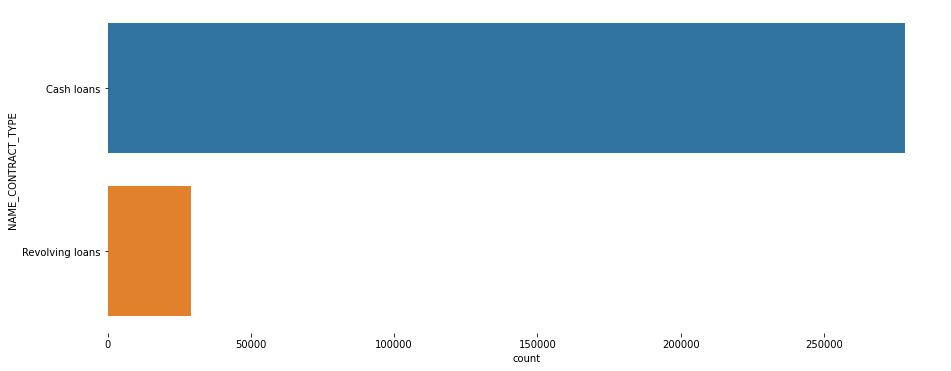

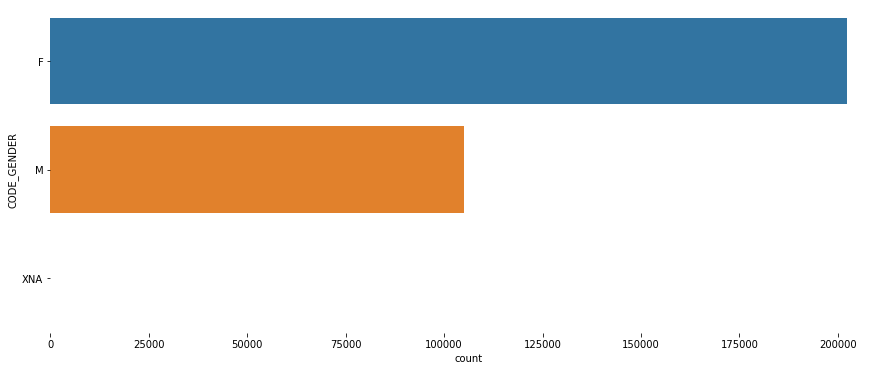

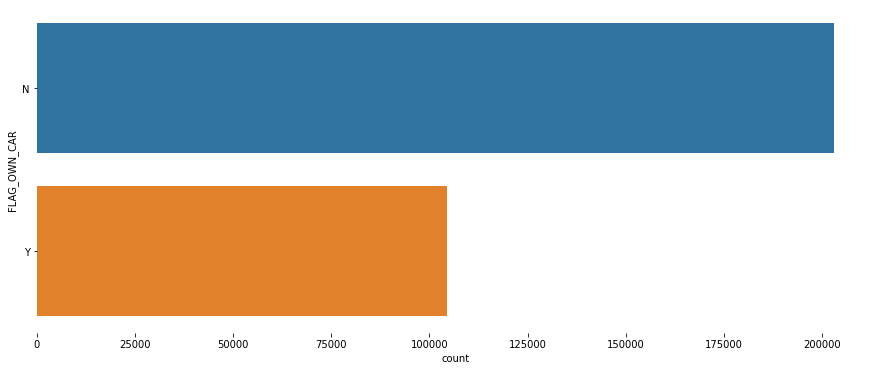

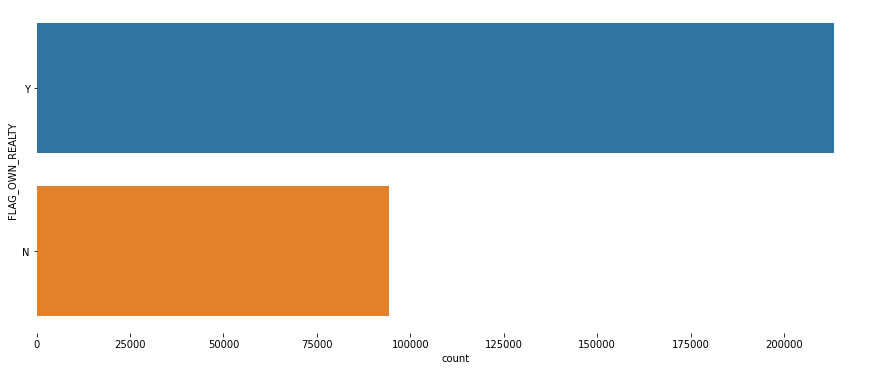

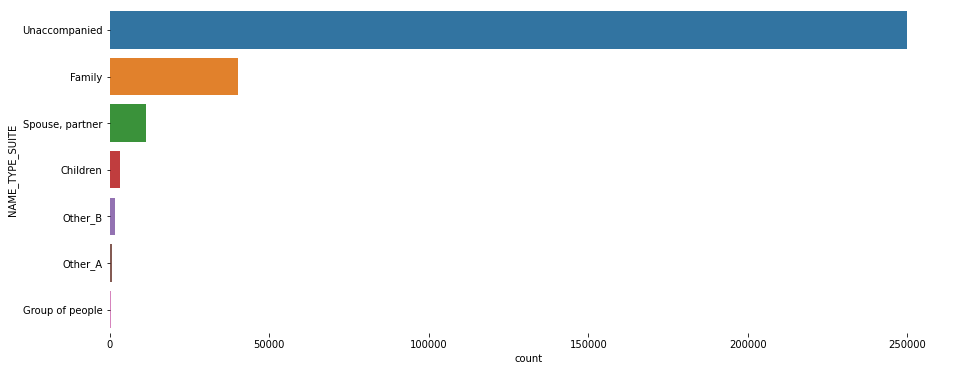

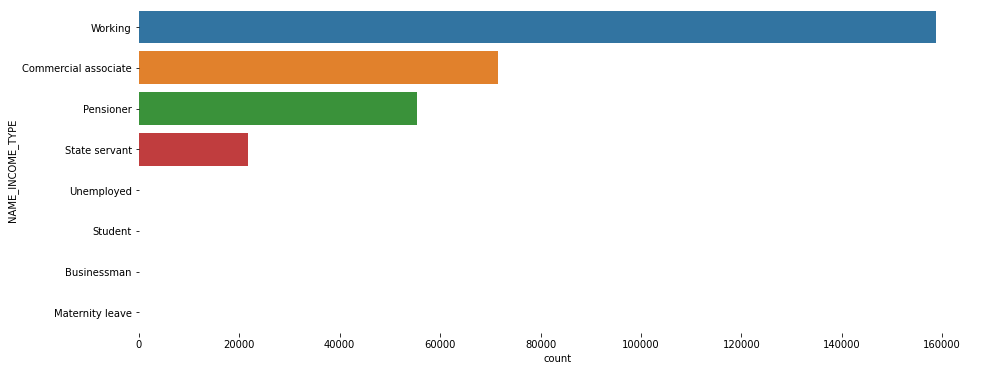

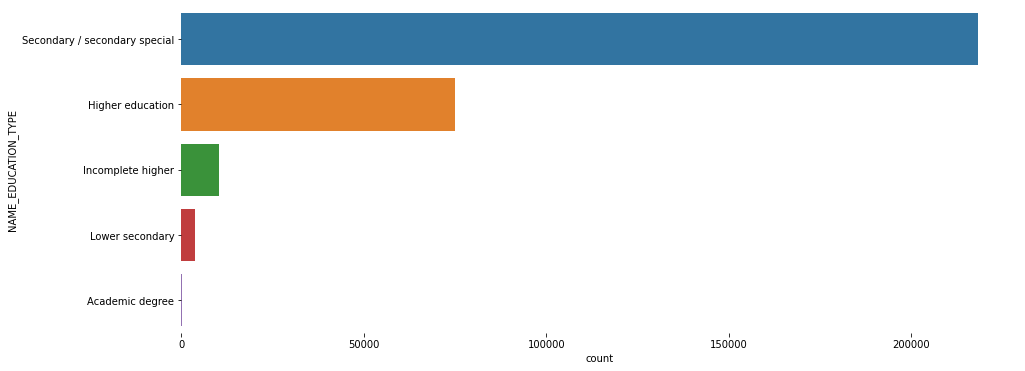

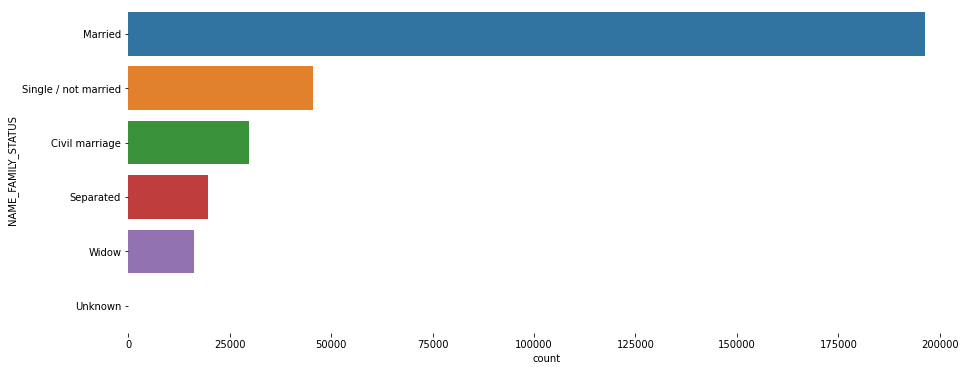

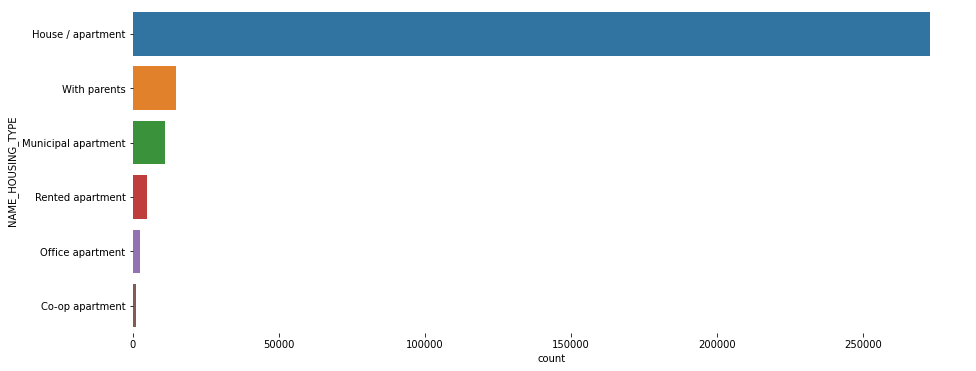

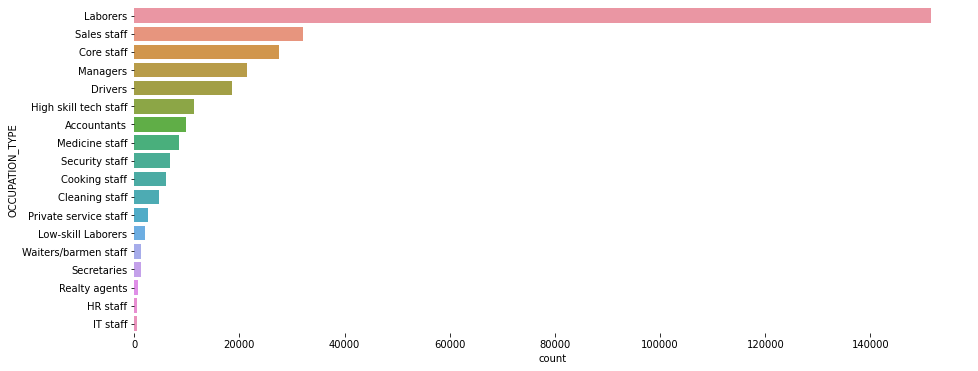

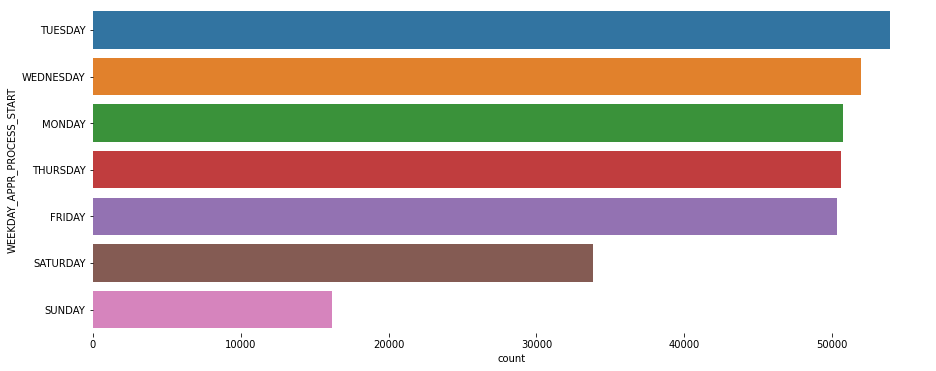

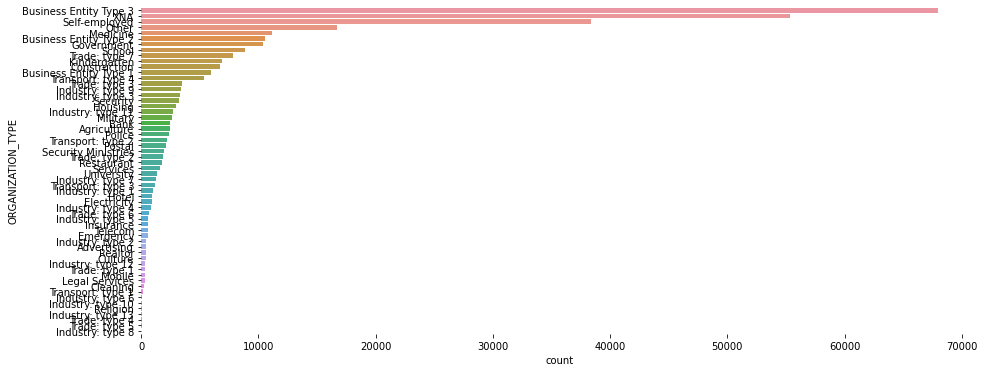

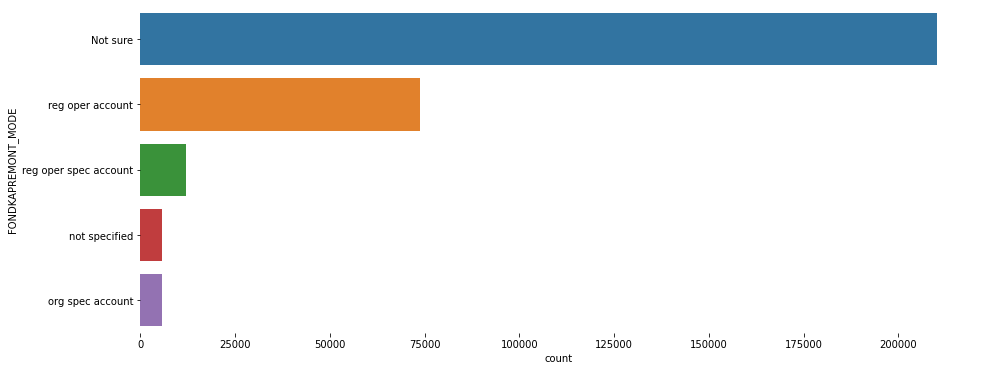

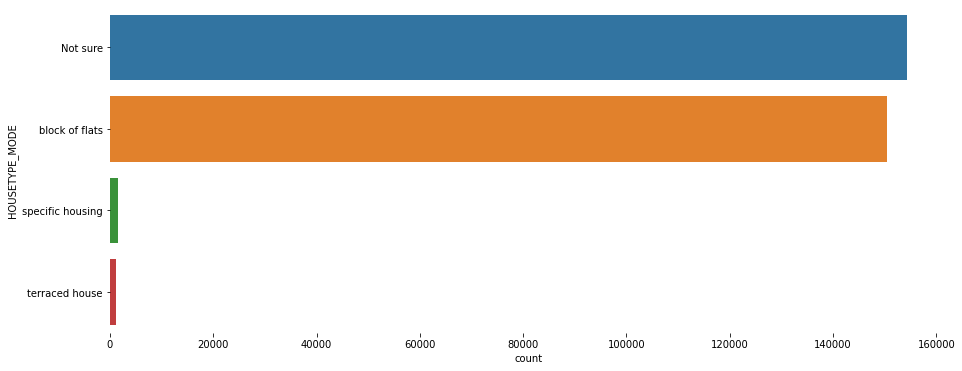

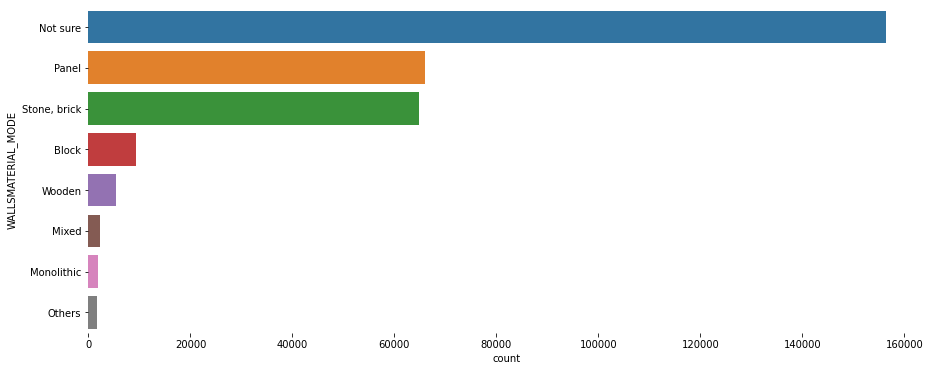

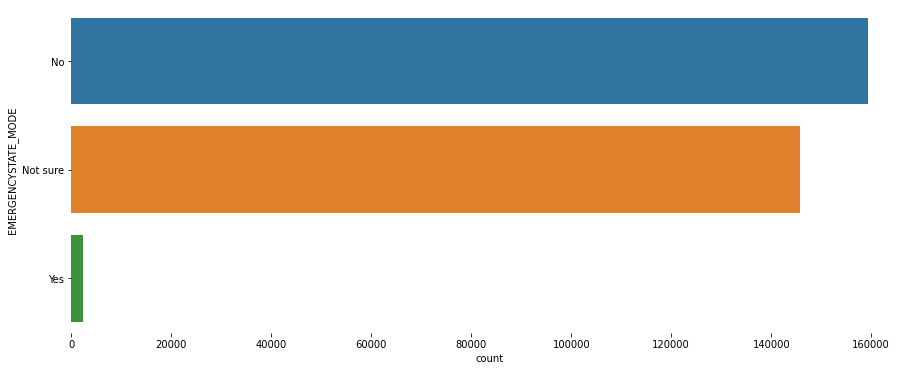

In [11]:
for col in app_train.describe(include='object'):
    
    fig, ax = plt.subplots(1,1, figsize=(15, 6))
    print(app_train[col].nunique(),col)
    if app_train[col].nunique() > 100:

        sns.histplot(app_train[col]);
    
        fig.text(0.1, 0.95, f'{col}', fontsize=16)
        plt.xlabel('value ', fontsize=10)
        plt.ylabel('count',fontsize=10)
        plt.yticks(fontsize=13)
    else:
        sns.countplot(y = app_train[col][1:], data = app_train.iloc[1:],order=app_train[col][1:].value_counts().index)
    plt.box(False)
#plt.rcParams['figure.figsize'] = [15, 5]

In [12]:
floats = []
for col in app_train.columns:
    if app_train[col].dtype != "object":
        floats.append(col)

/var/folders/zh/dvg4994d0_v8dpj_6tb0y44r0000gn/T/ipykernel_24508/3120953329.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1, figsize=(15, 6))


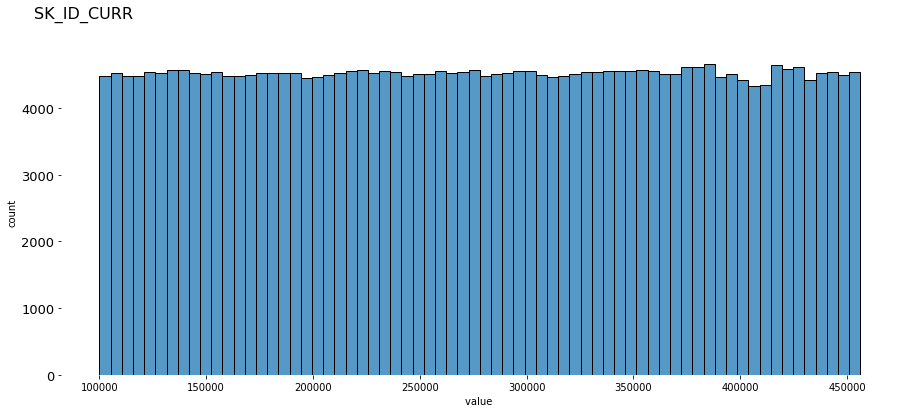

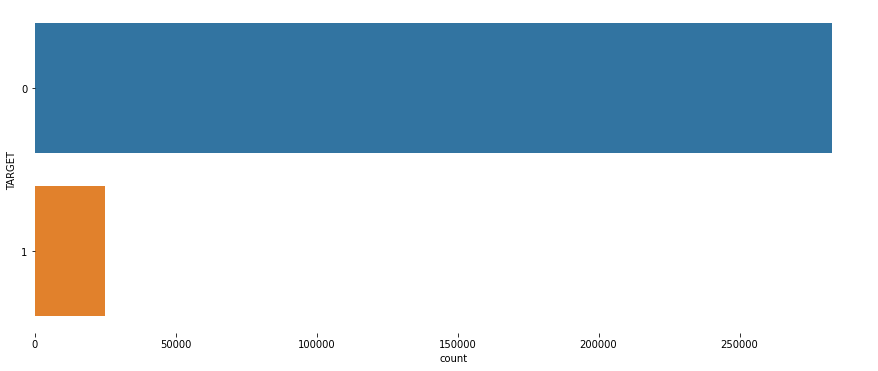

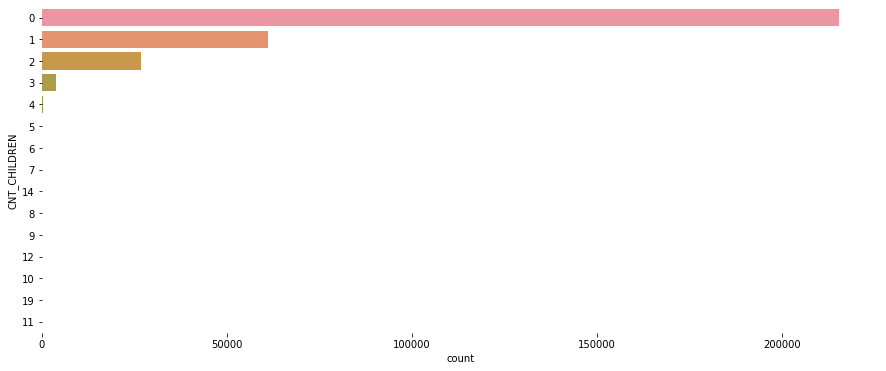

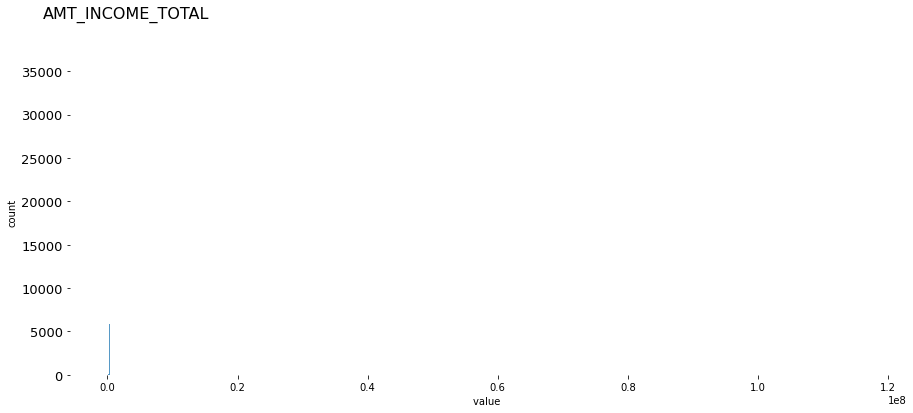

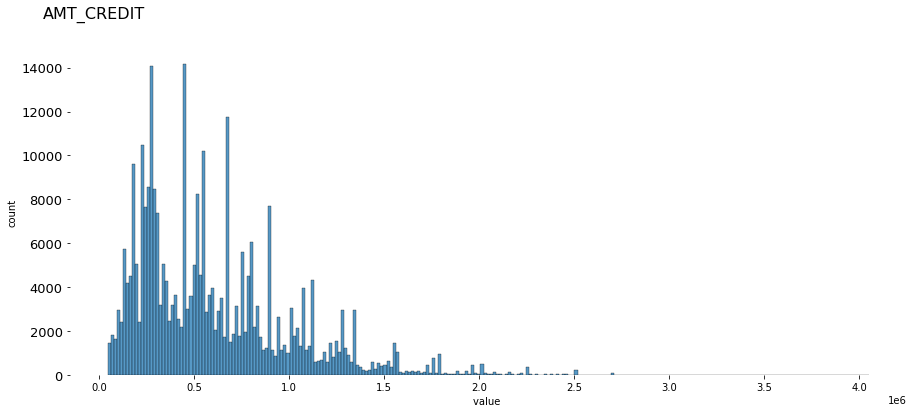

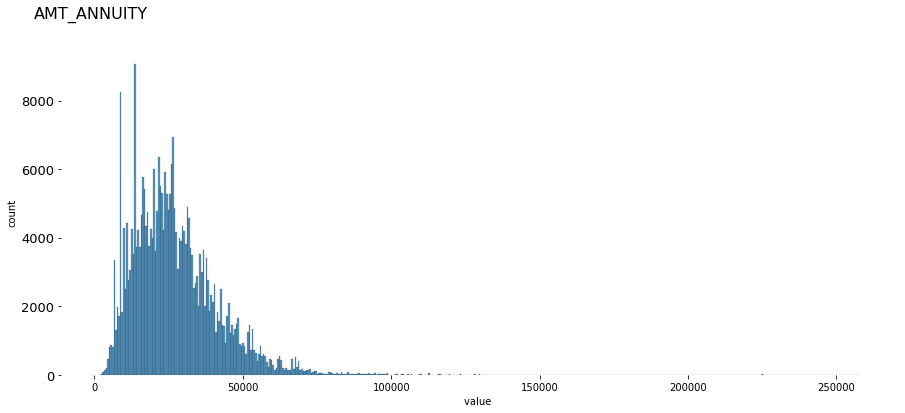

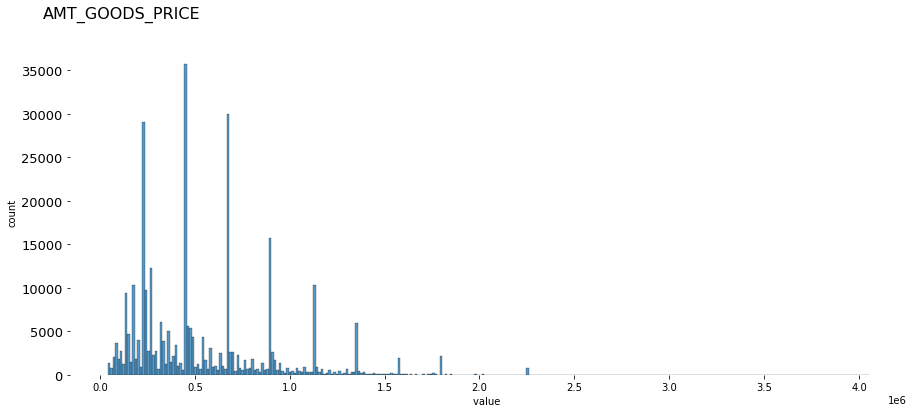

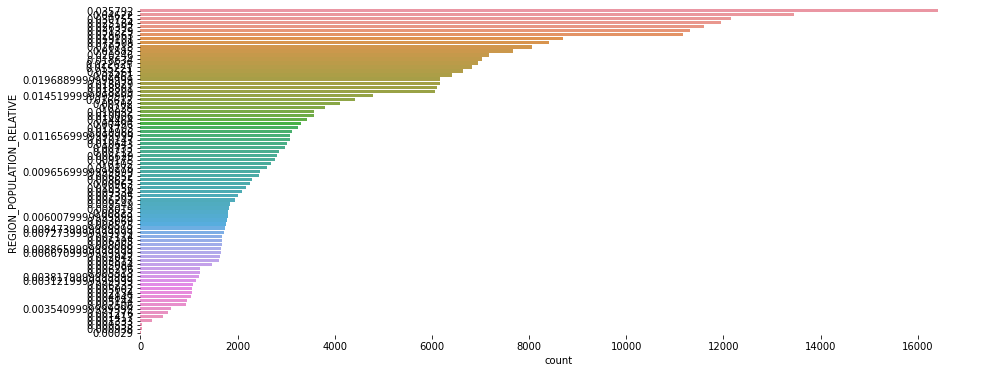

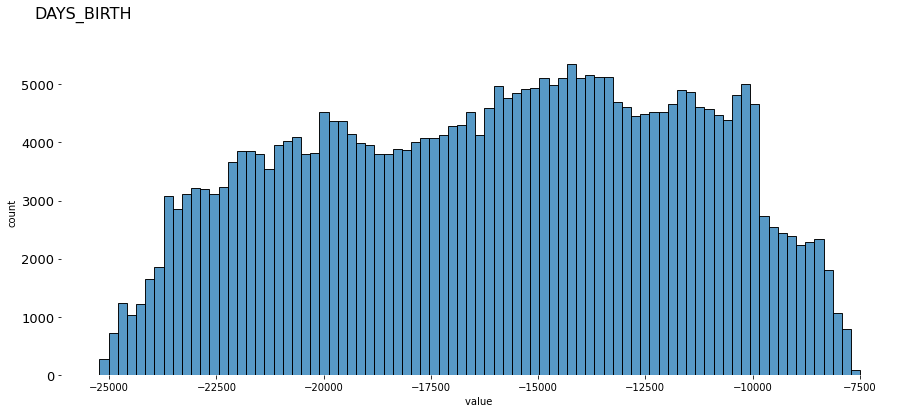

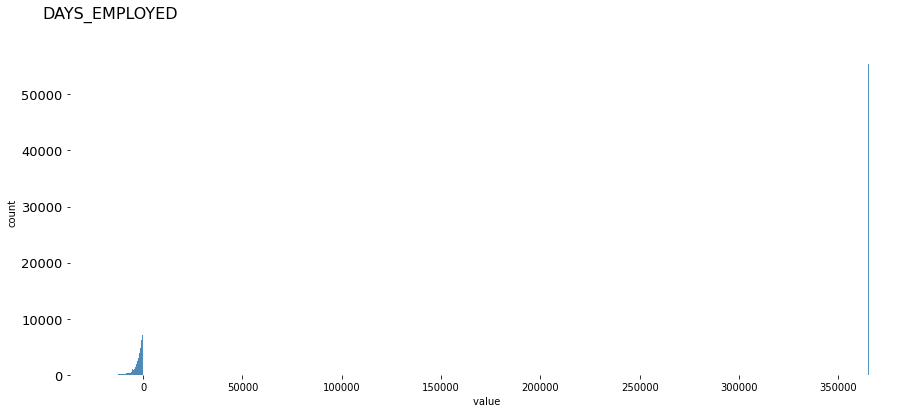

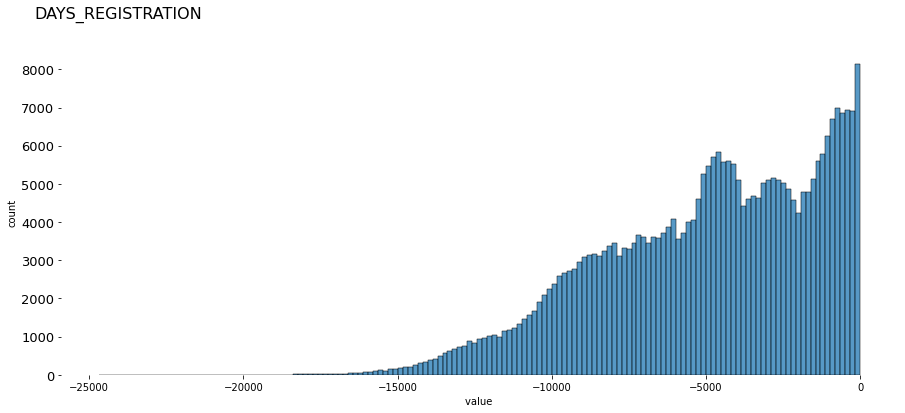

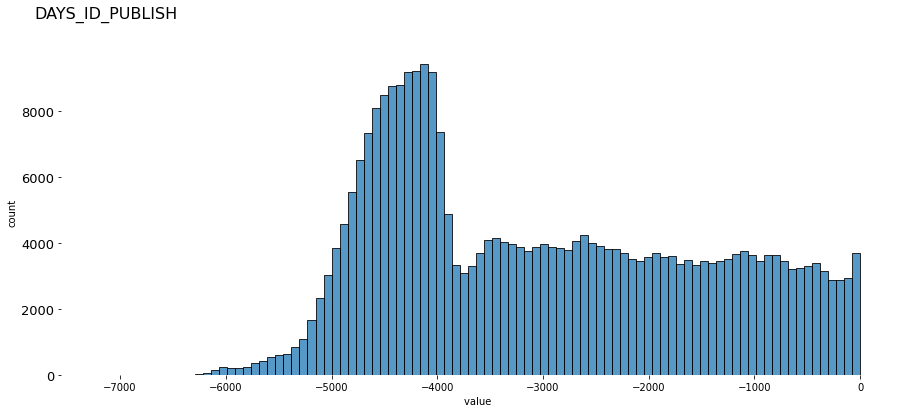

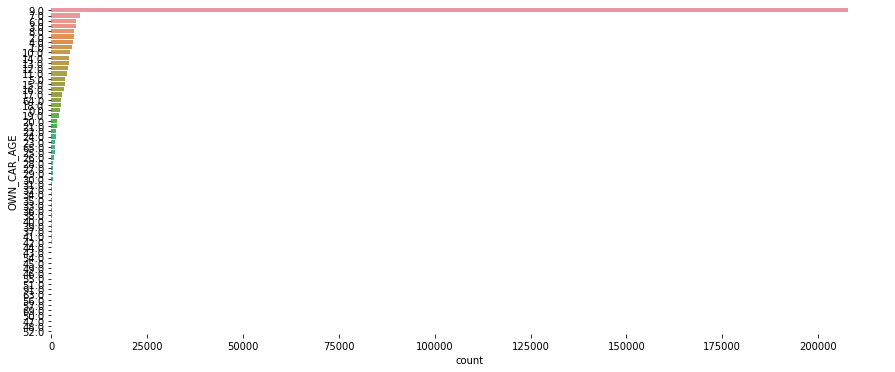

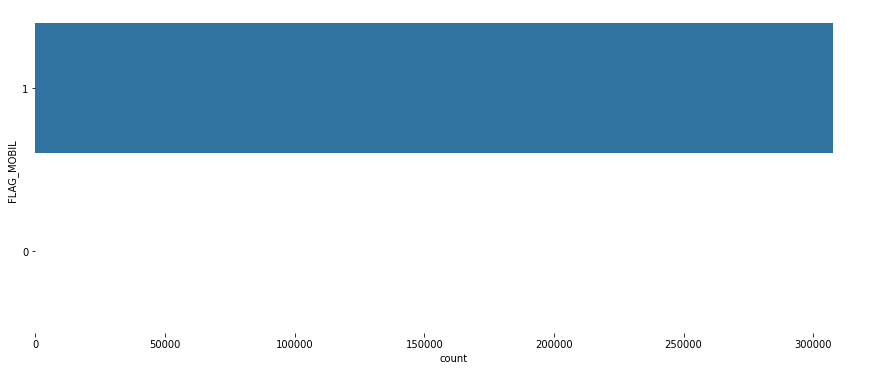

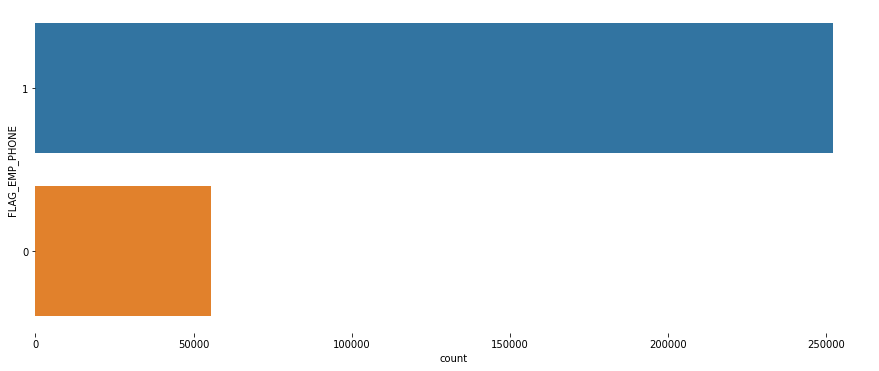

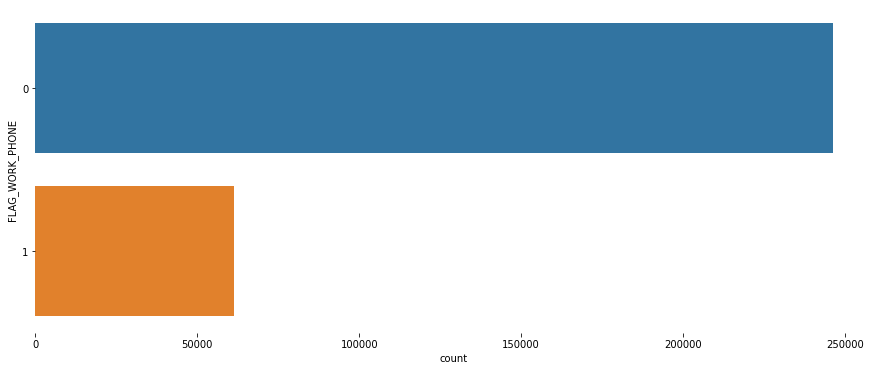

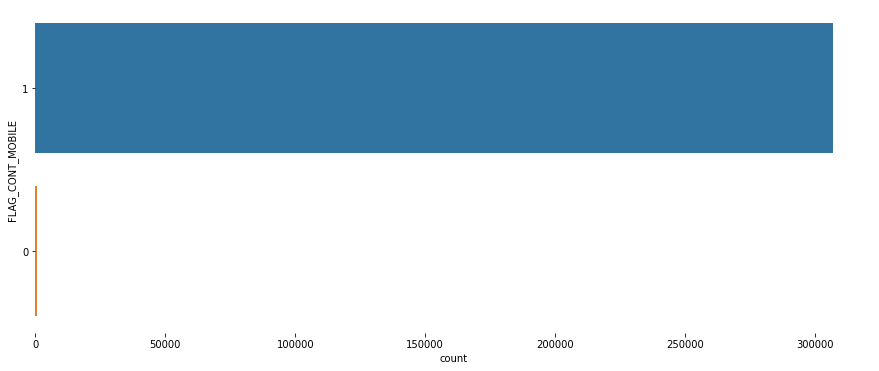

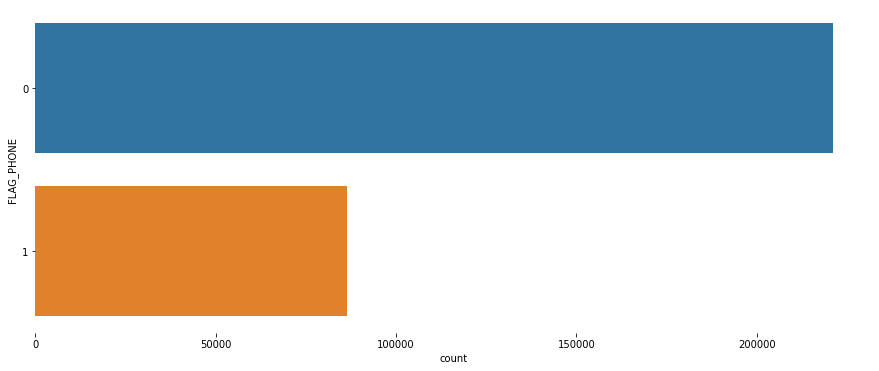

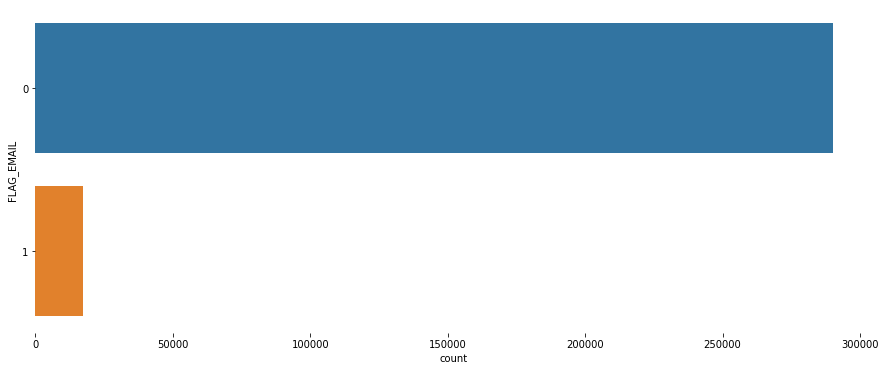

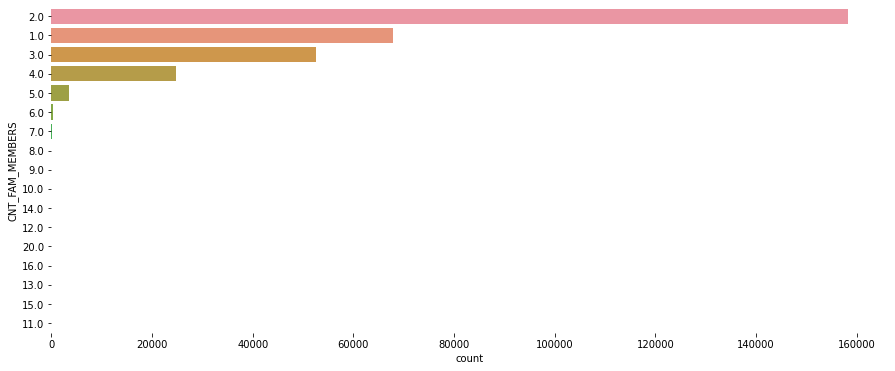

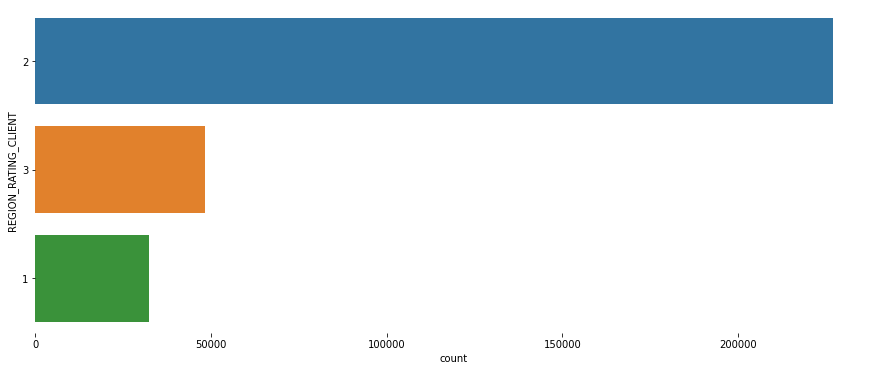

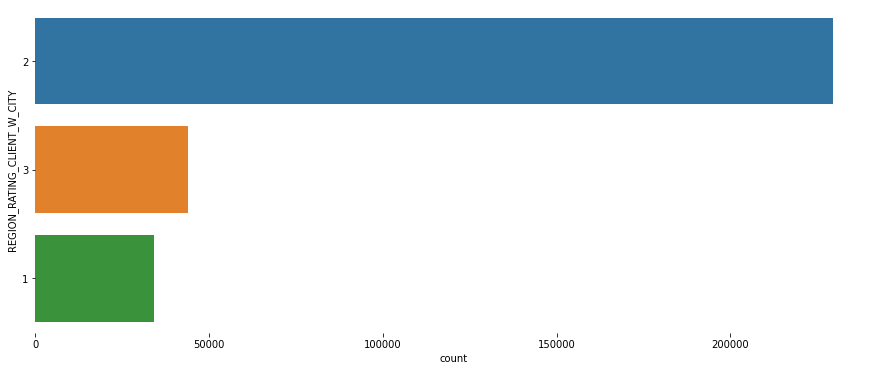

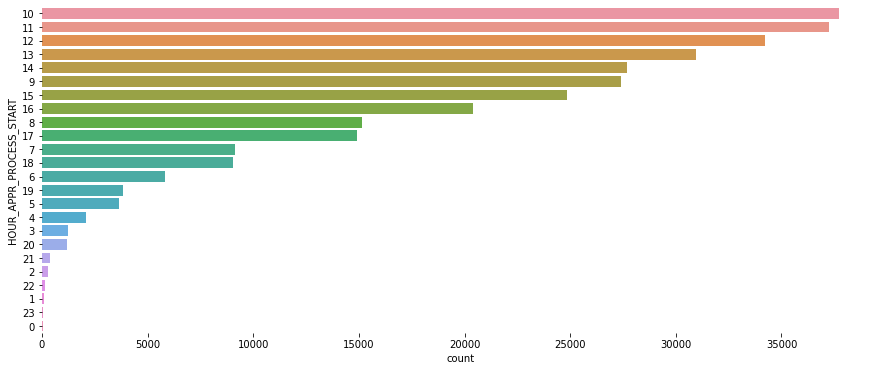

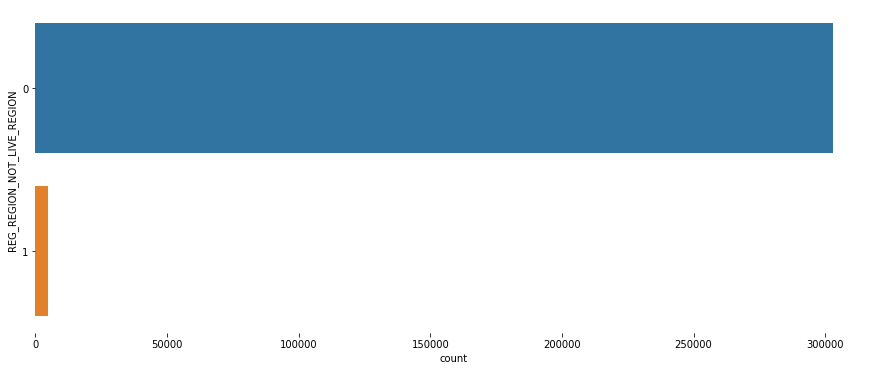

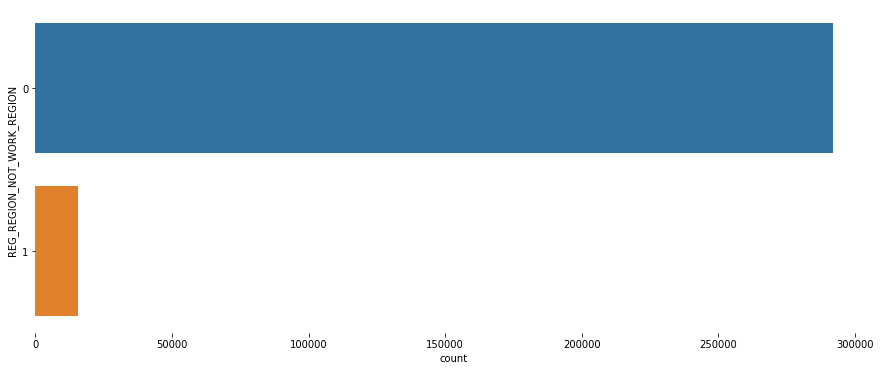

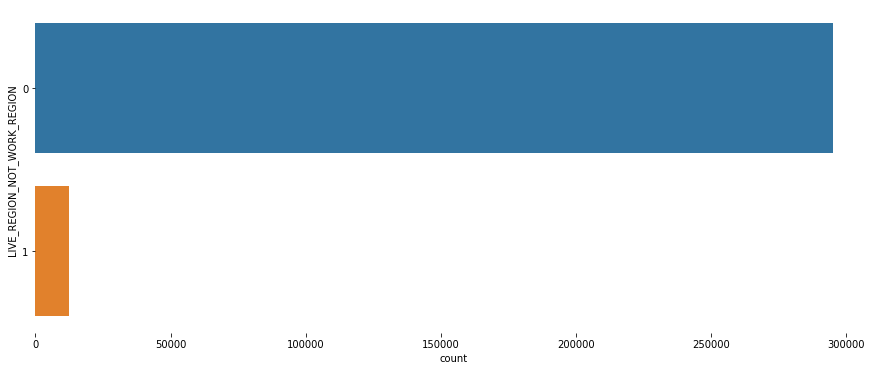

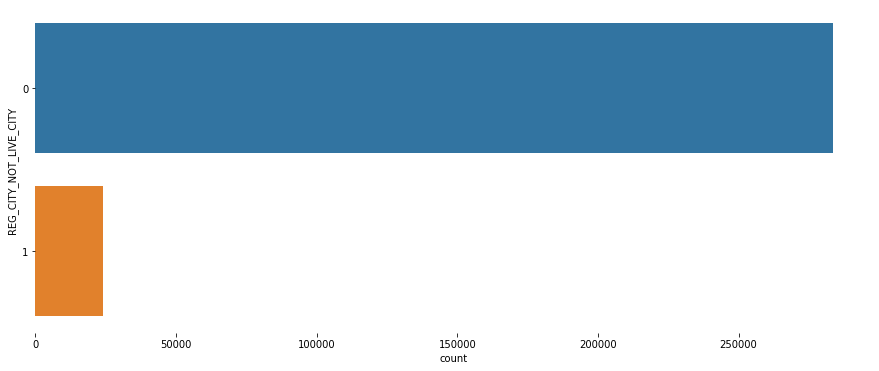

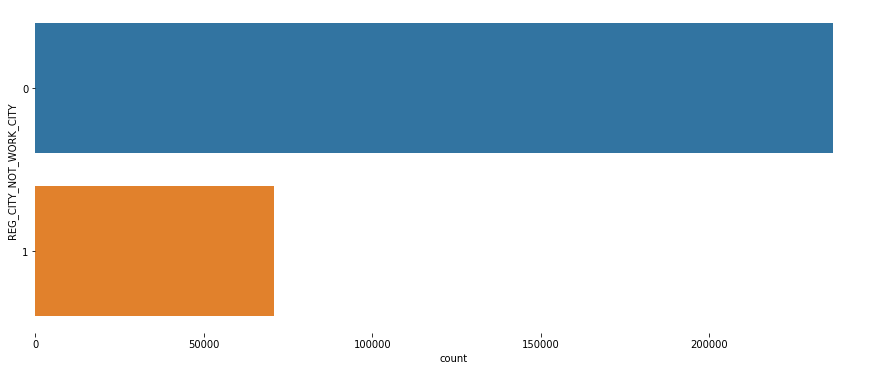

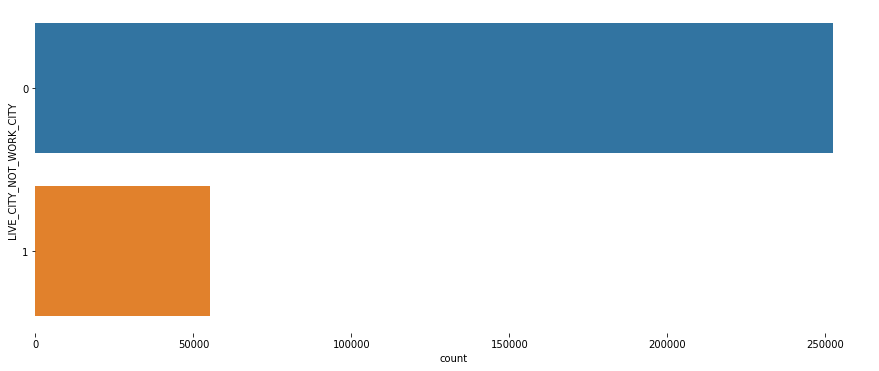

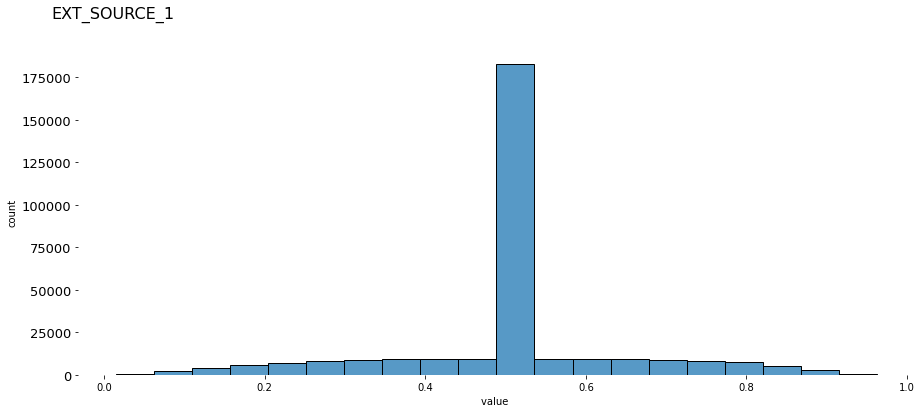

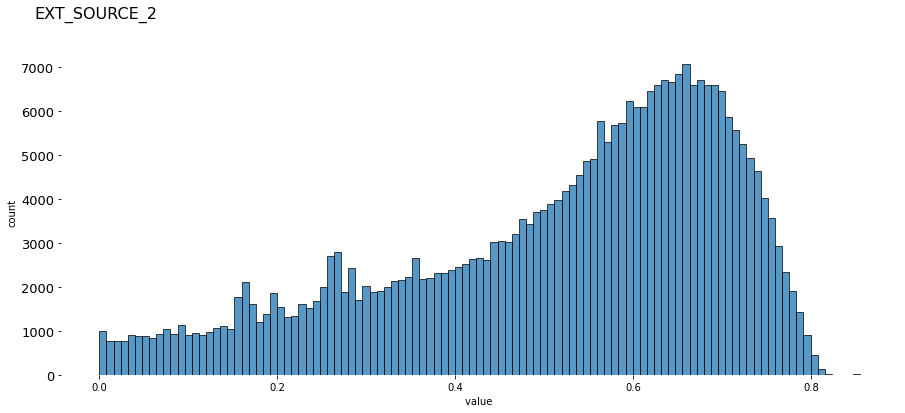

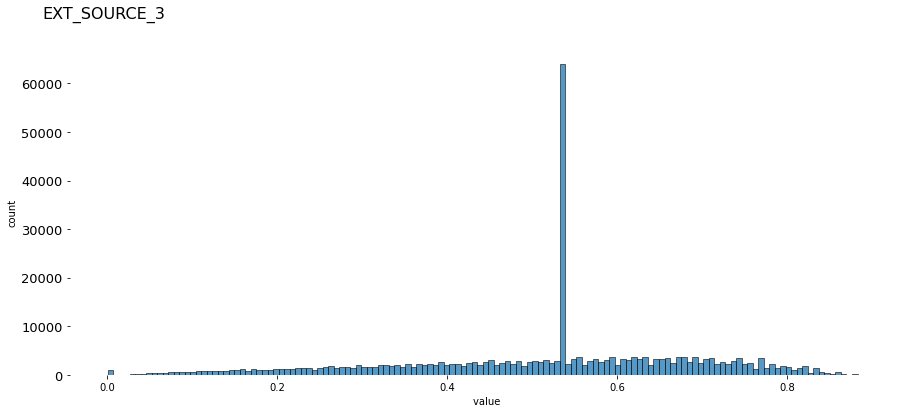

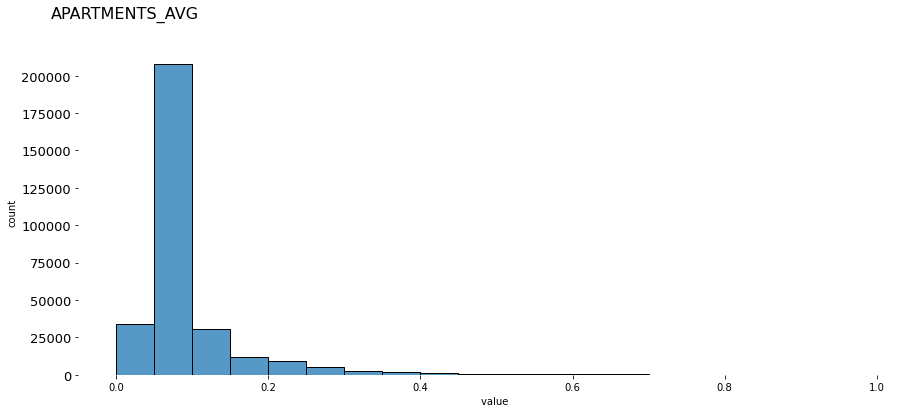

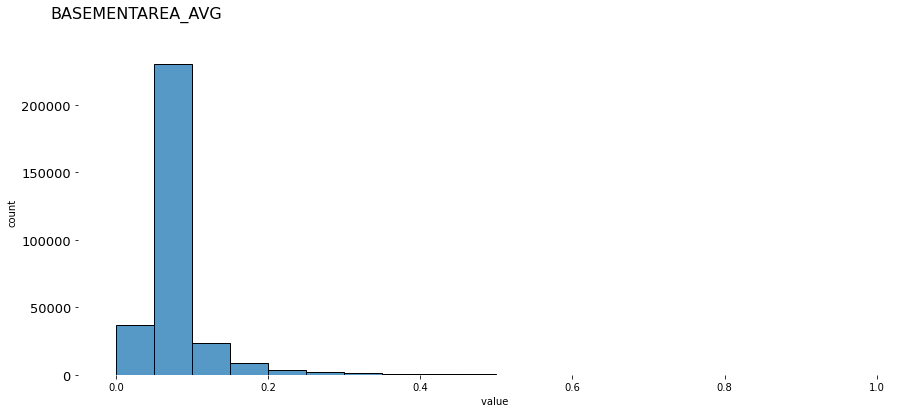

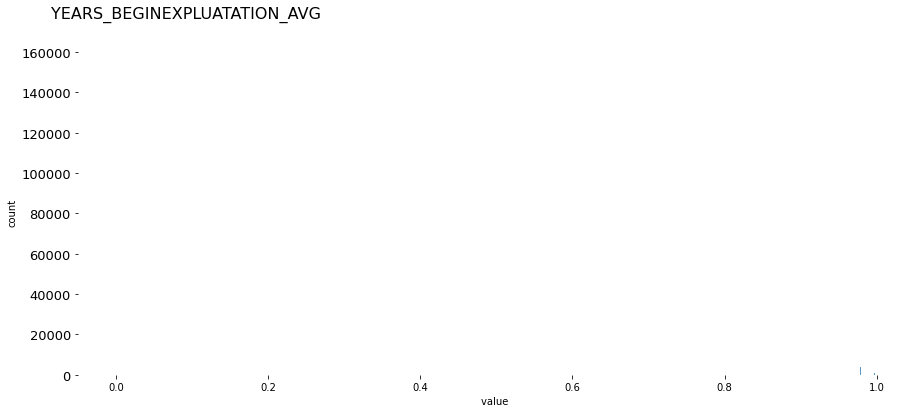

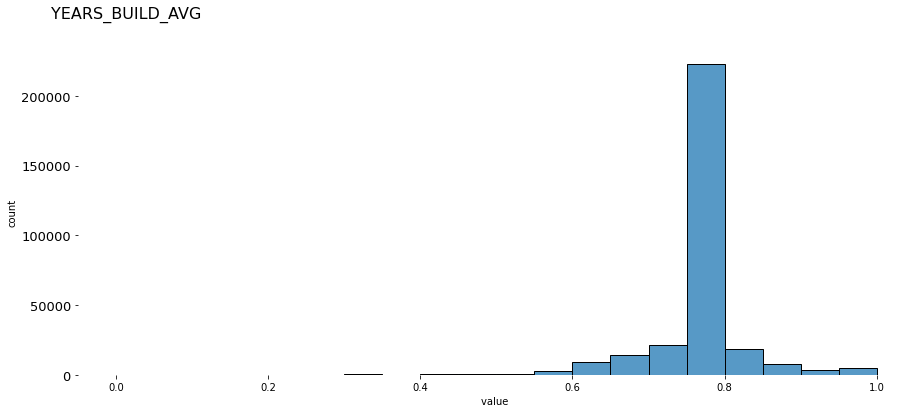

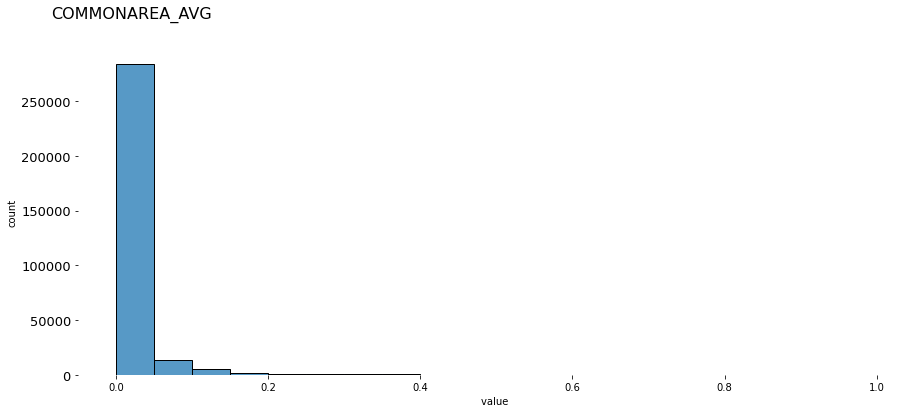

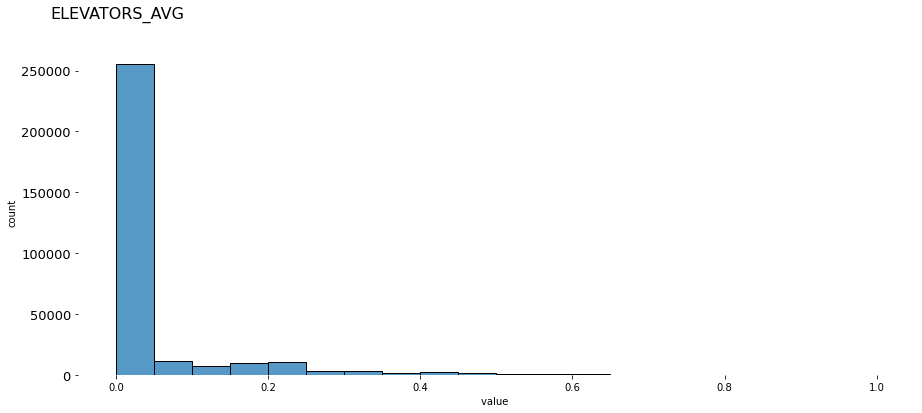

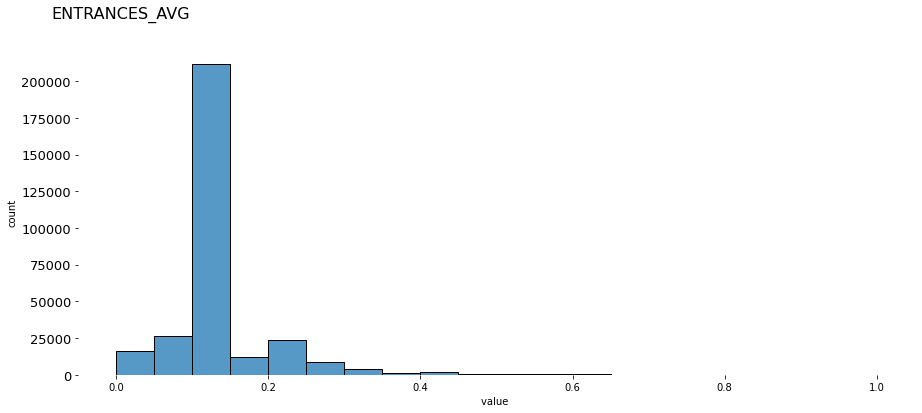

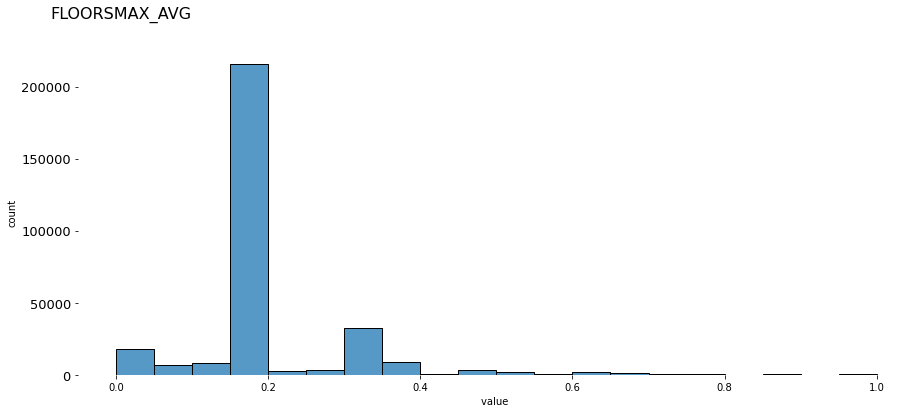

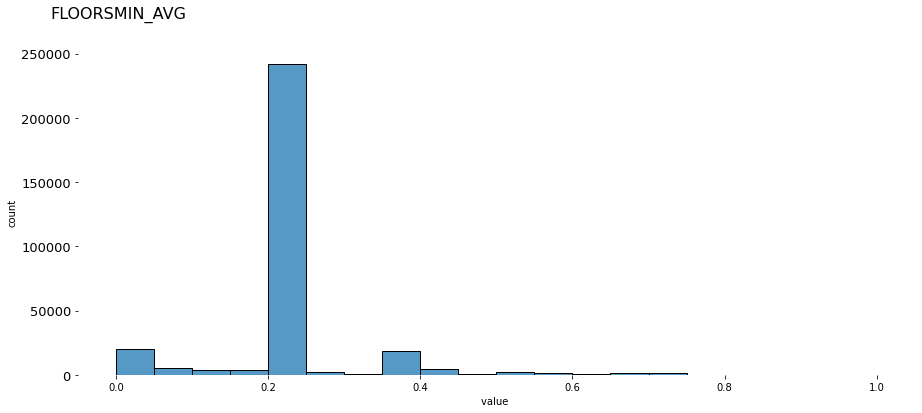

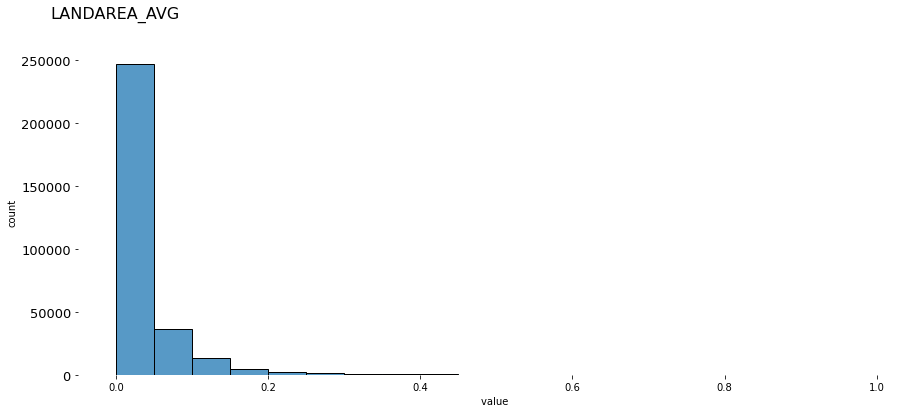

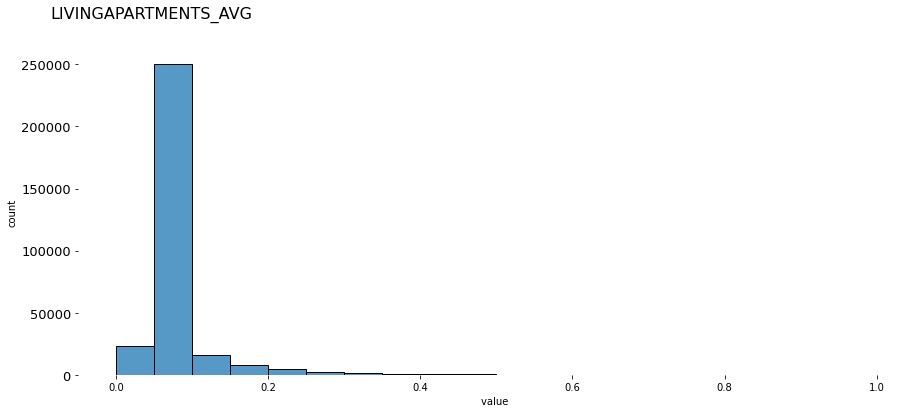

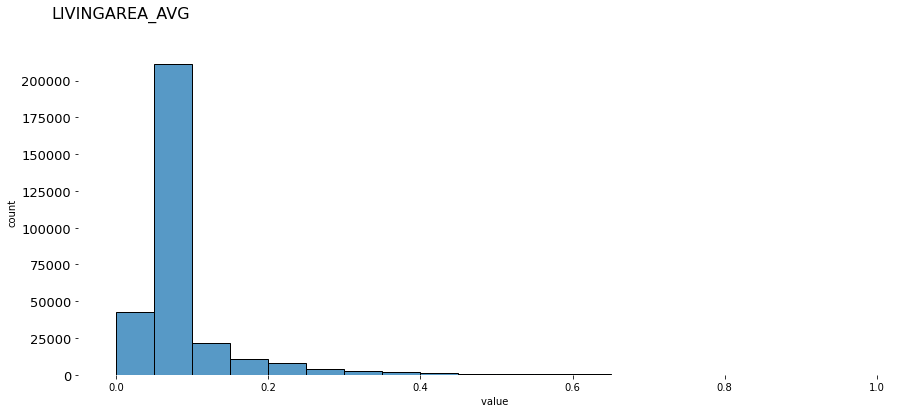

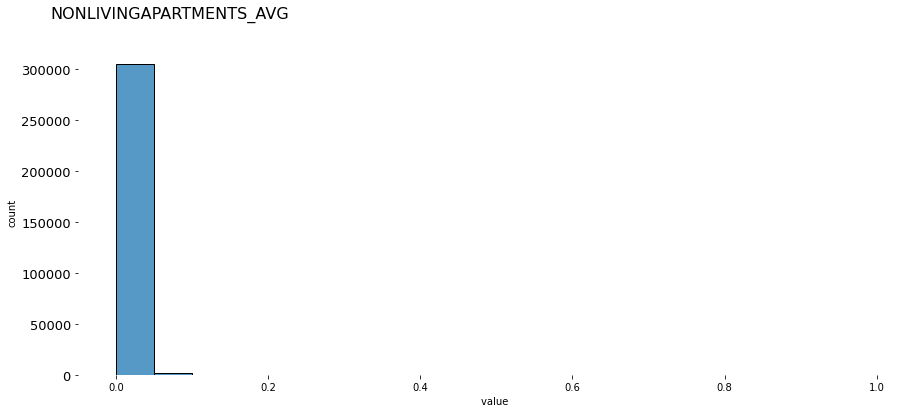

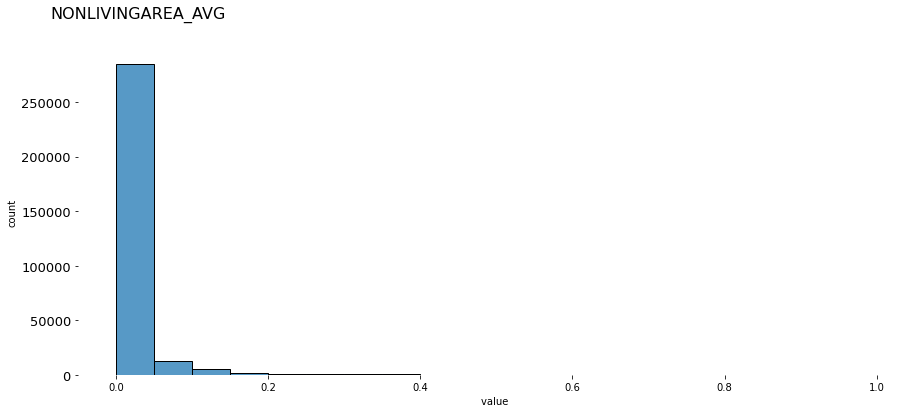

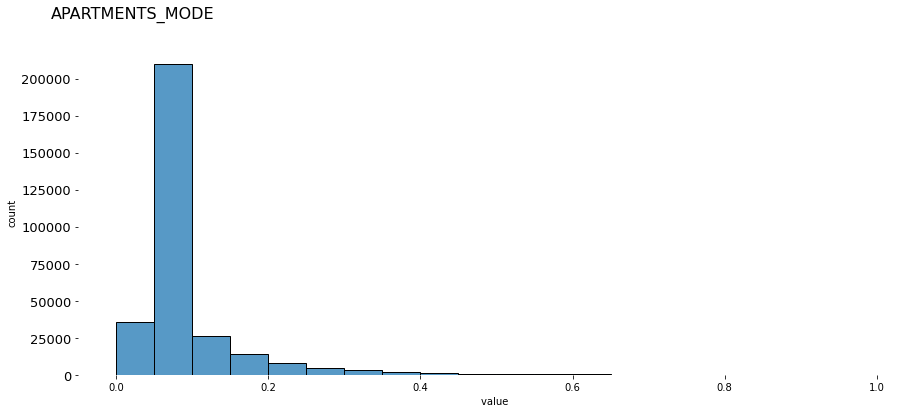

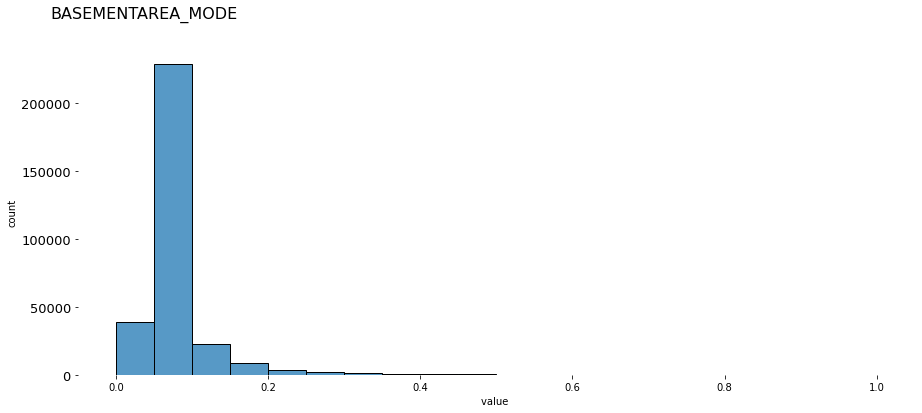

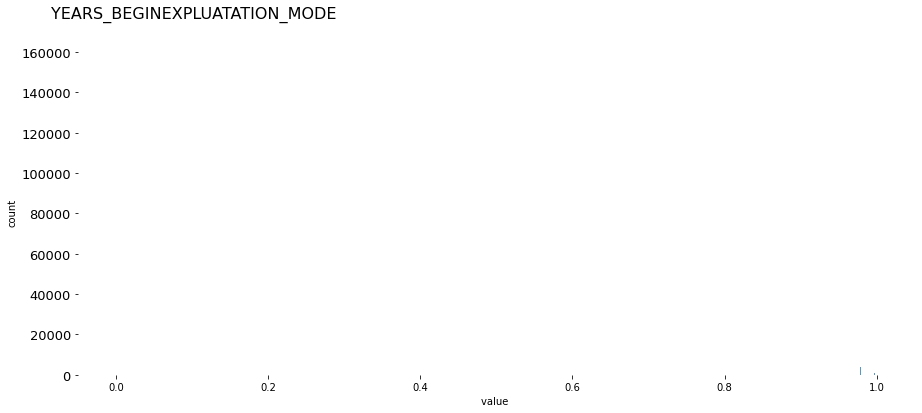

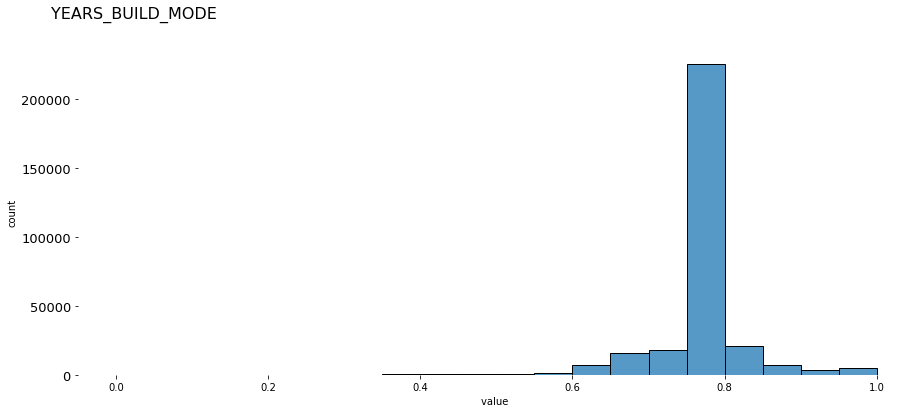

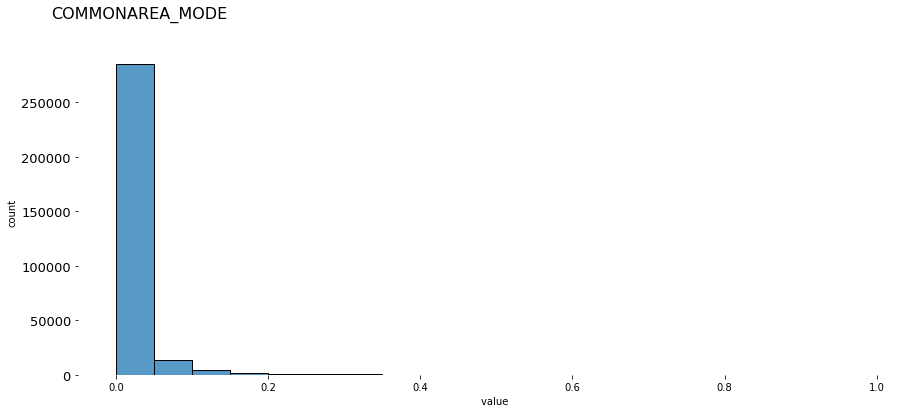

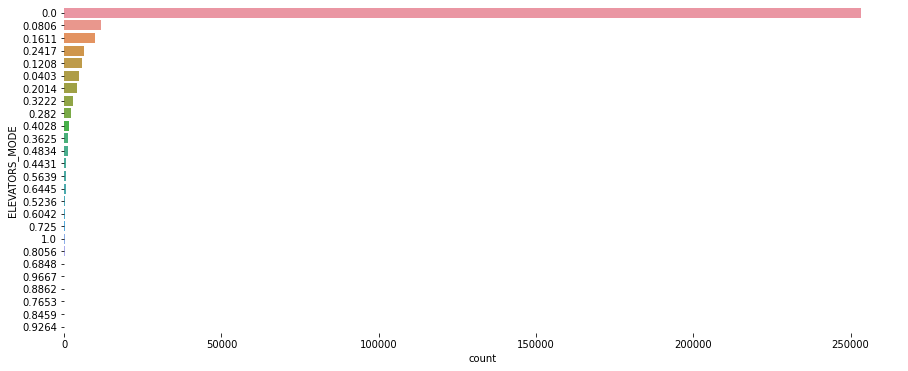

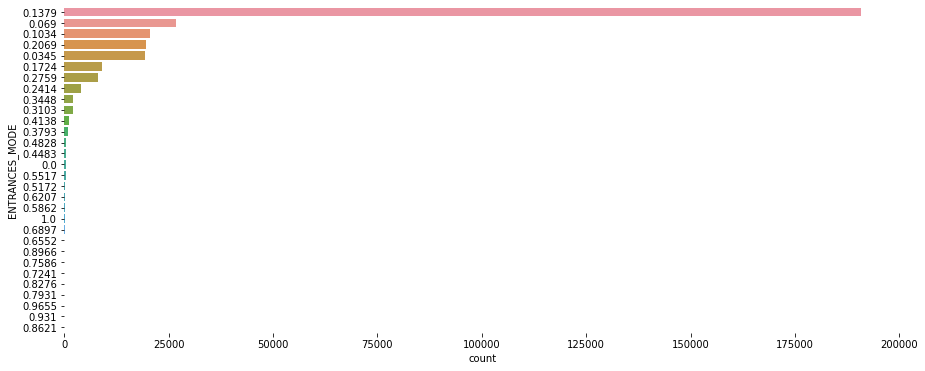

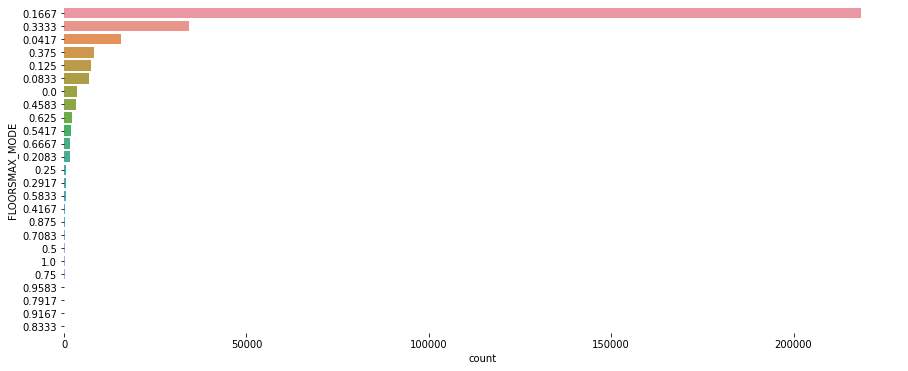

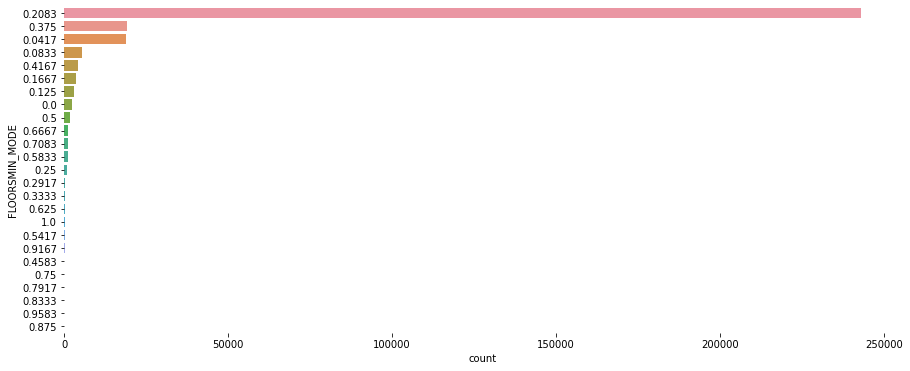

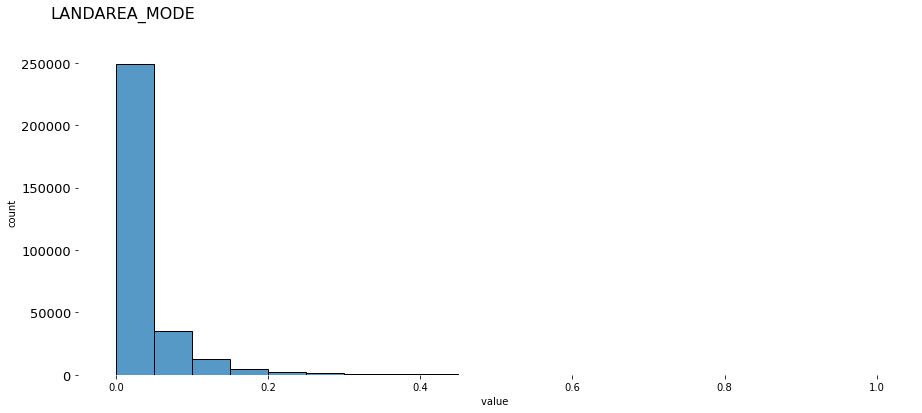

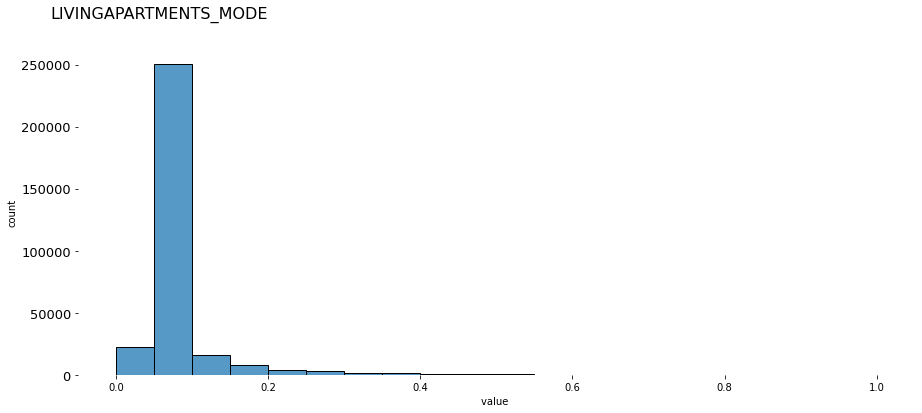

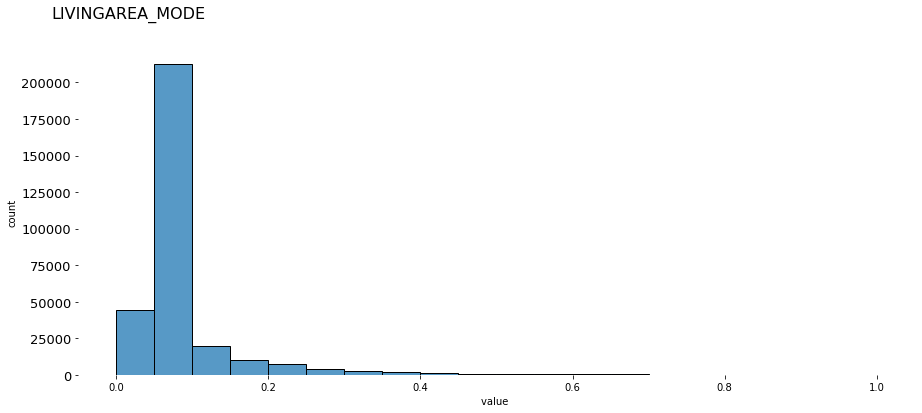

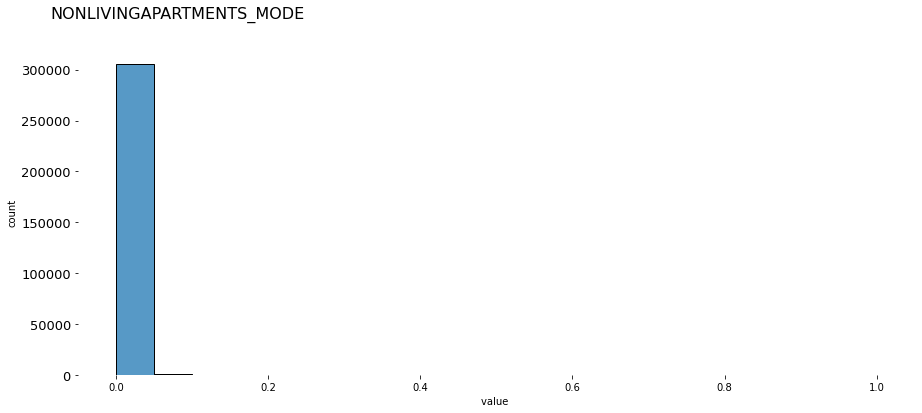

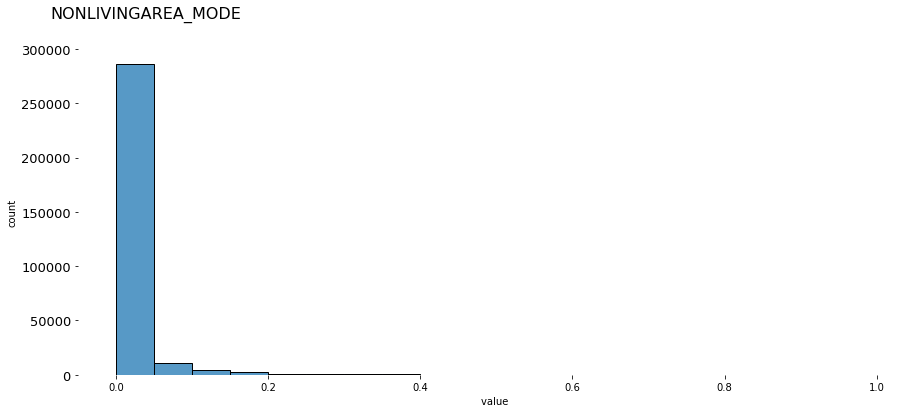

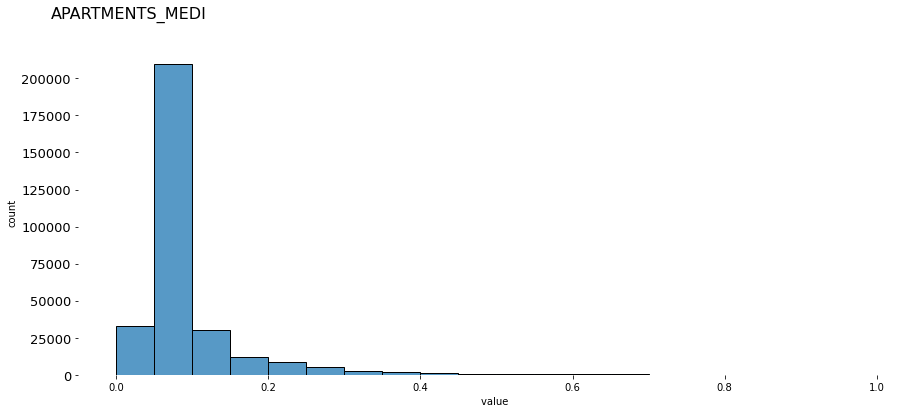

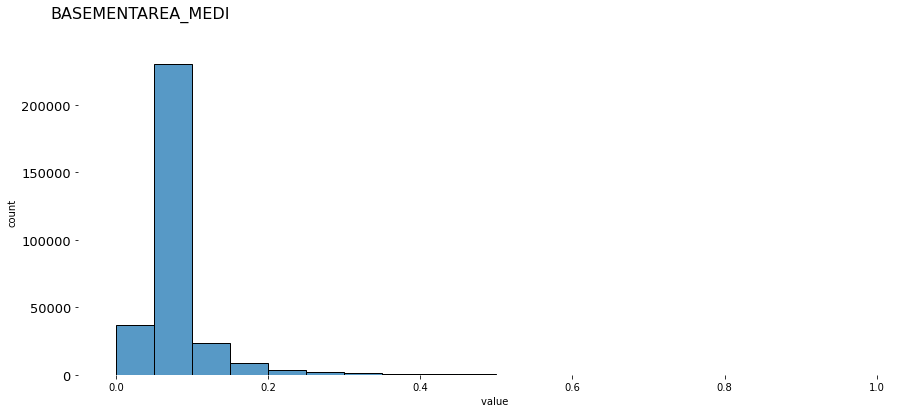

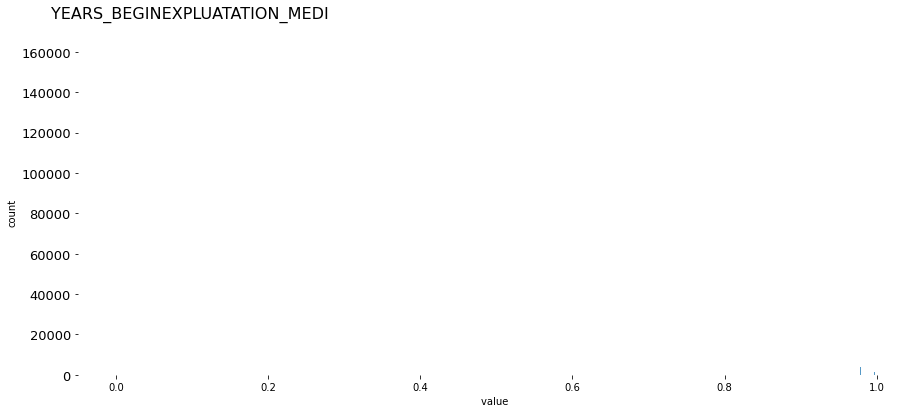

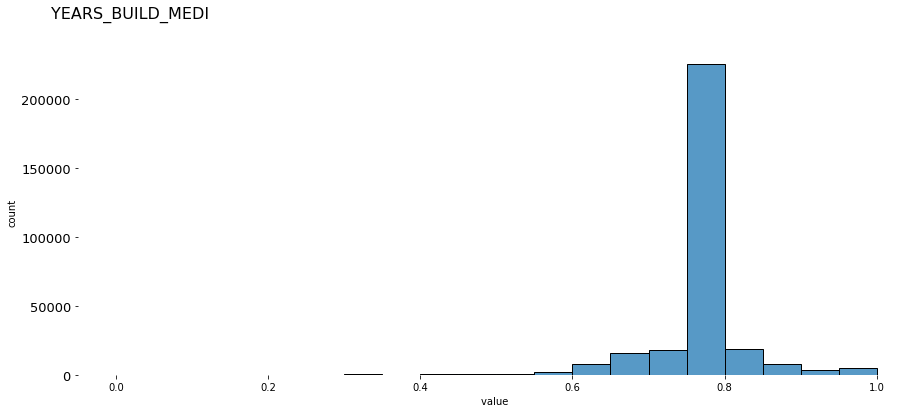

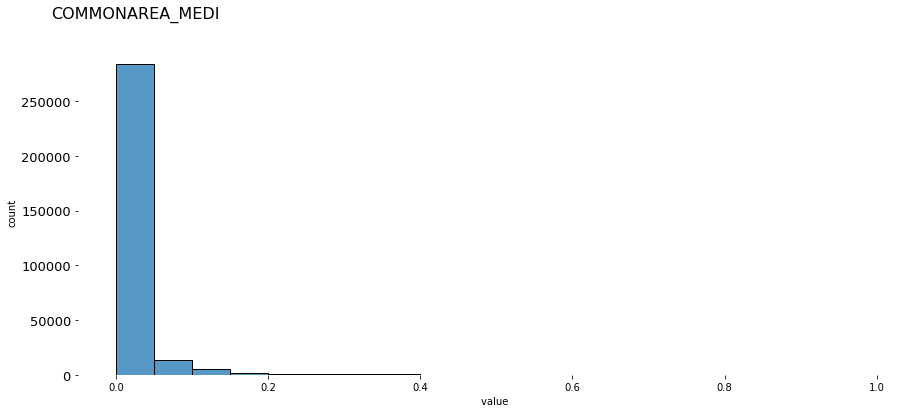

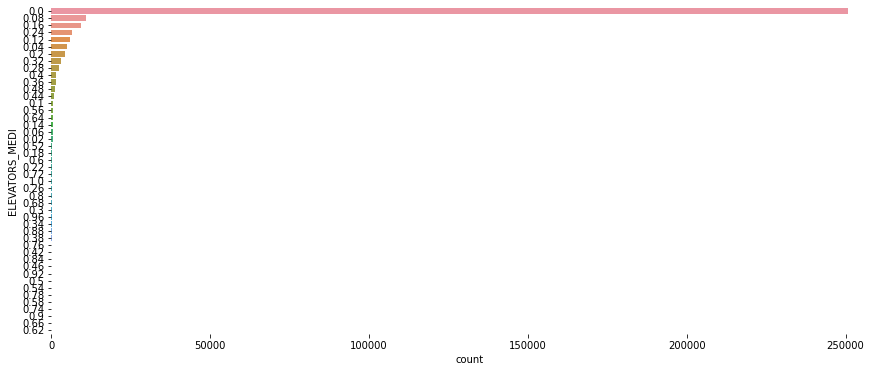

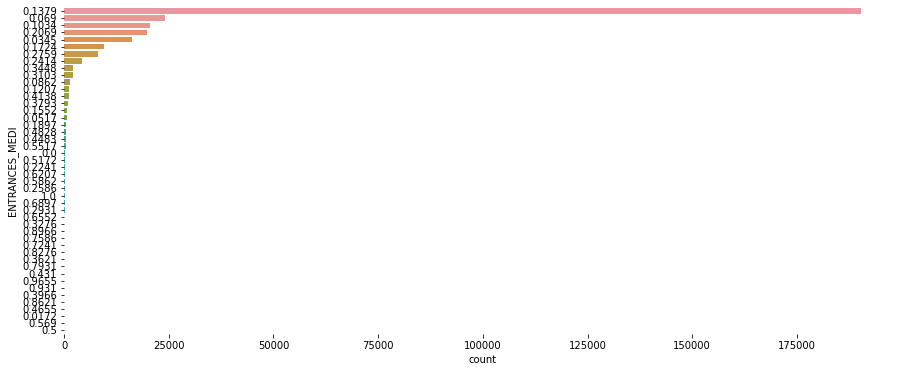

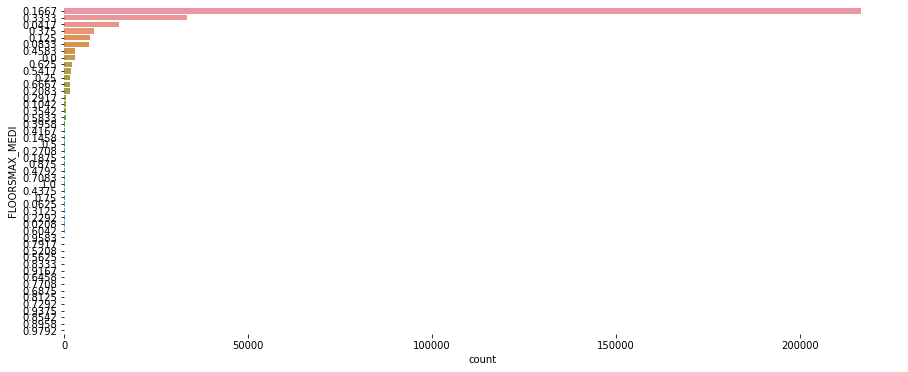

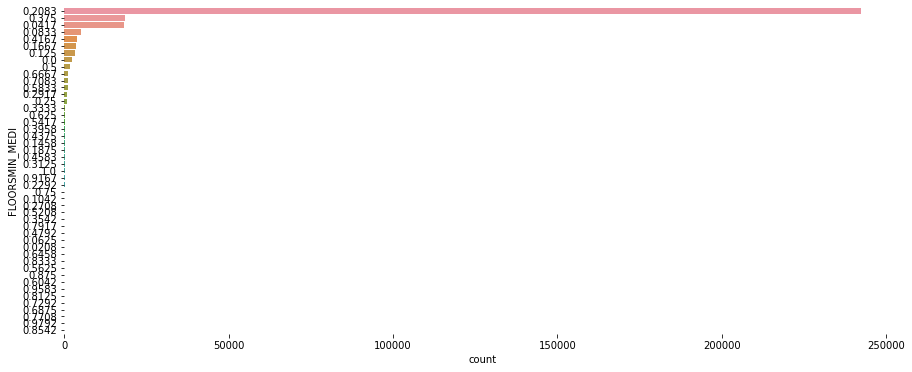

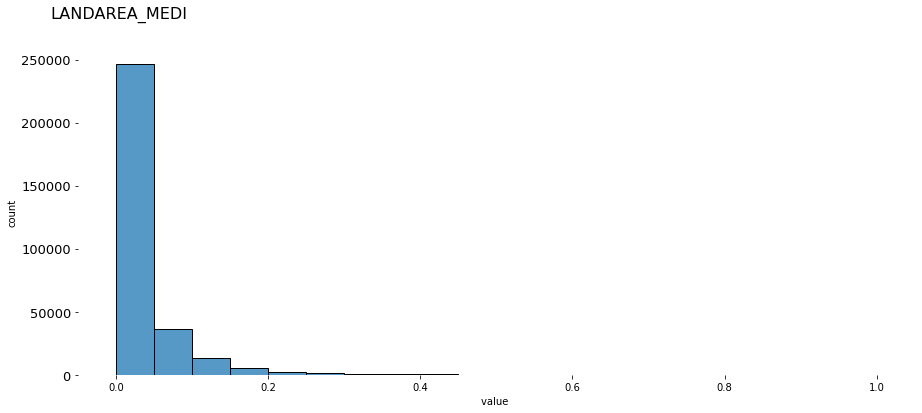

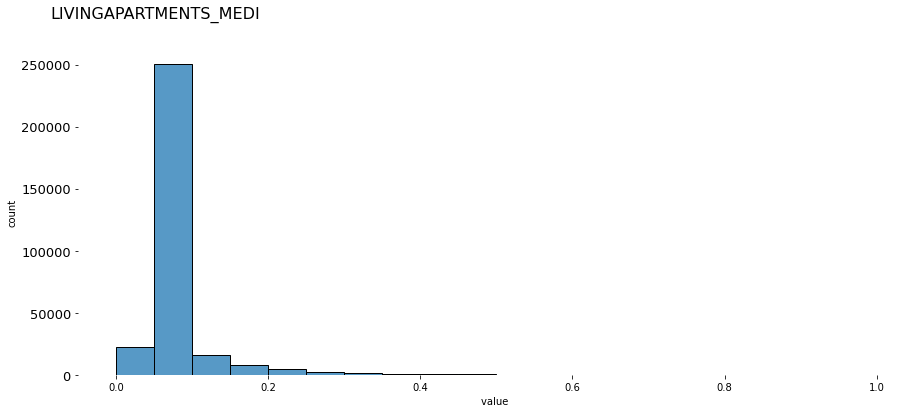

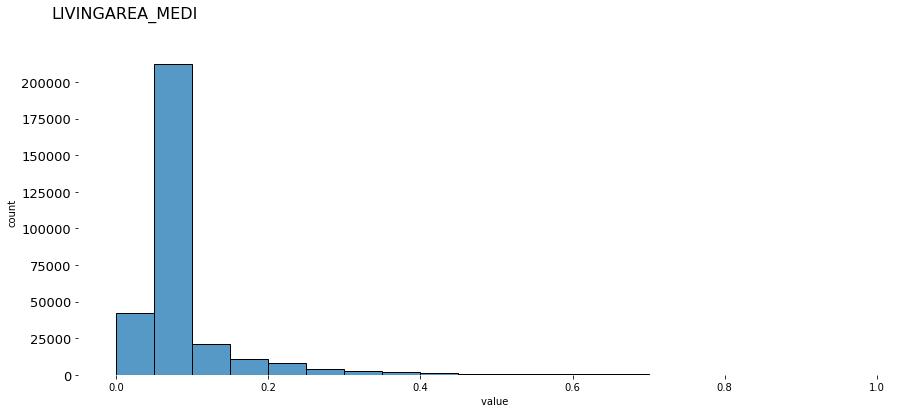

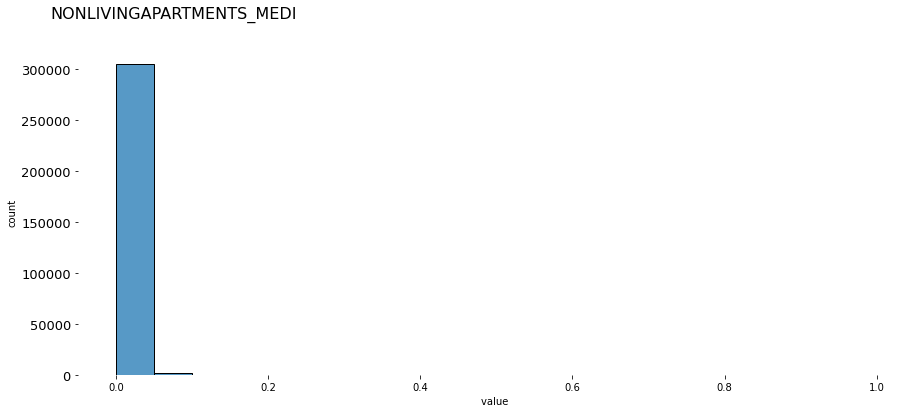

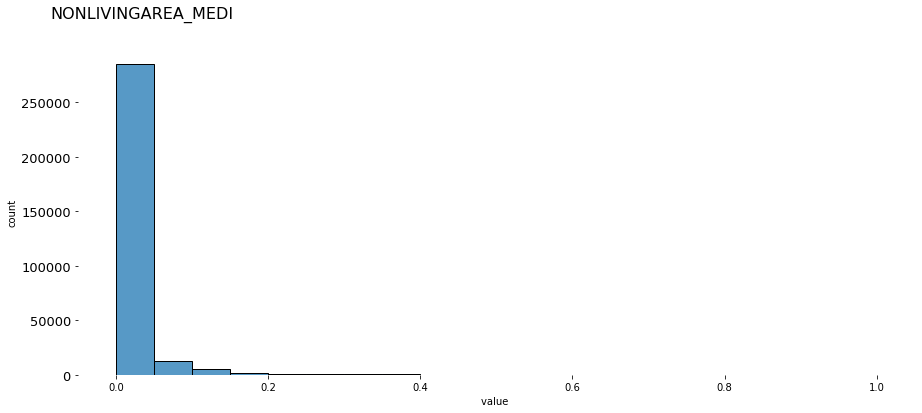

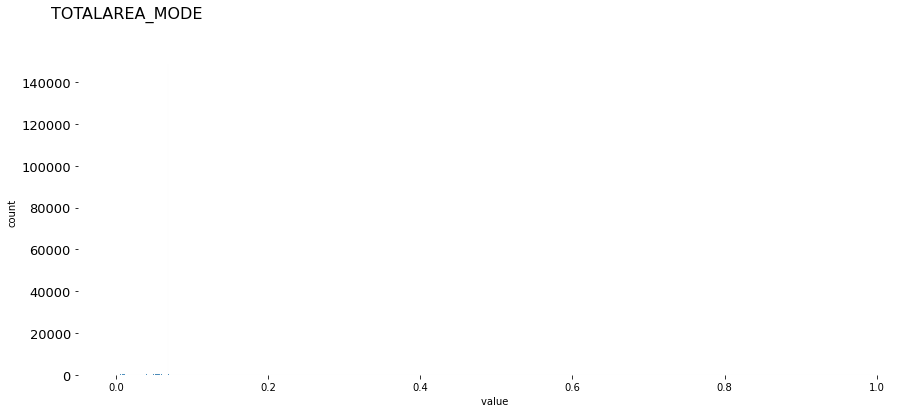

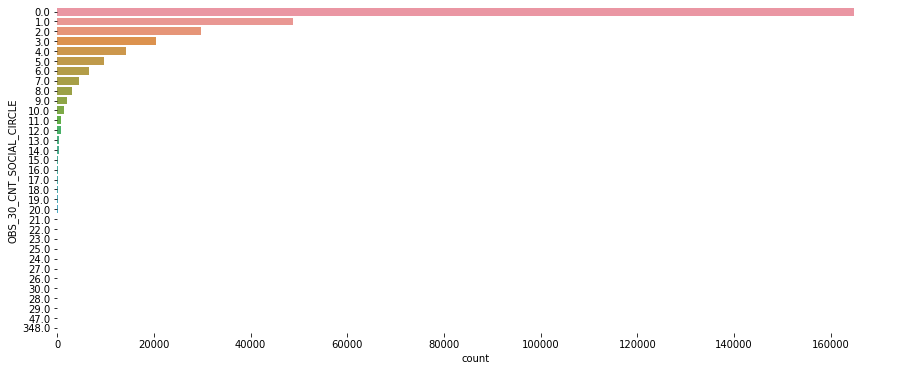

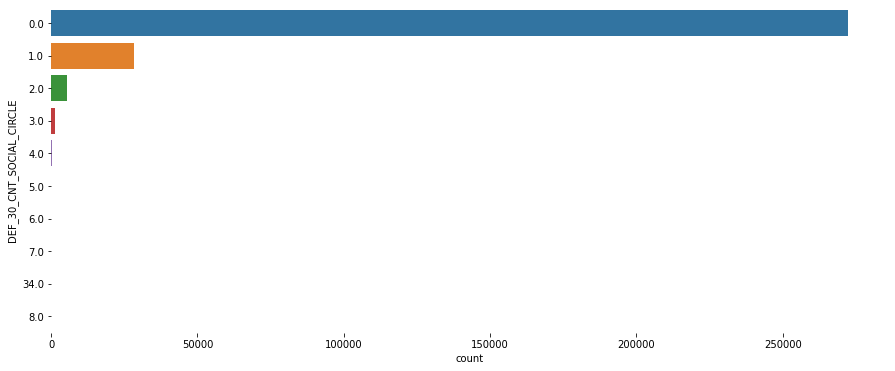

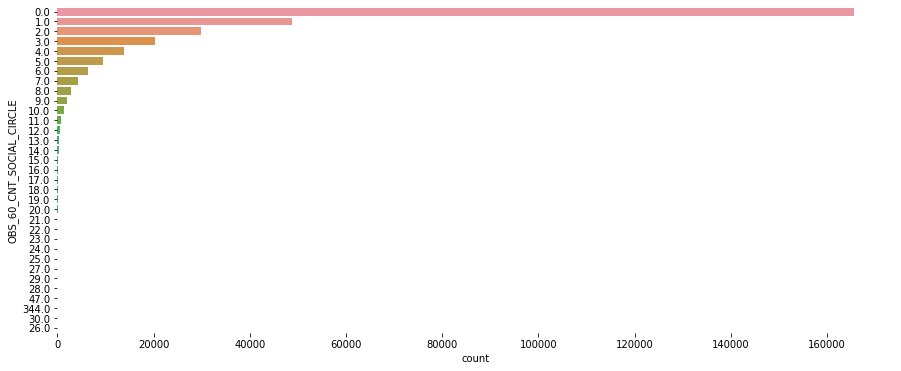

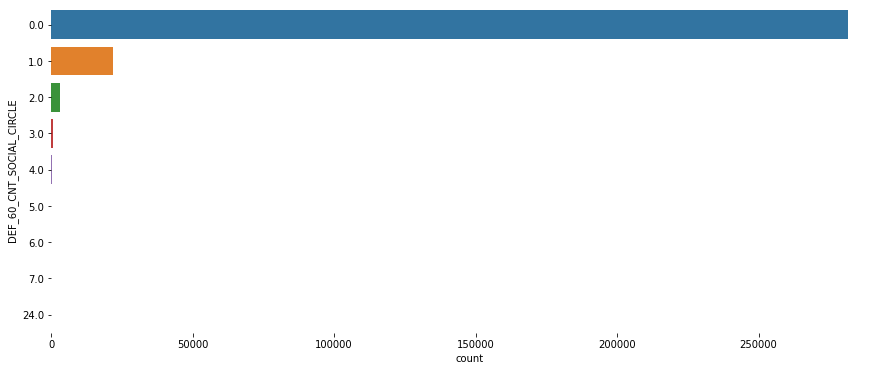

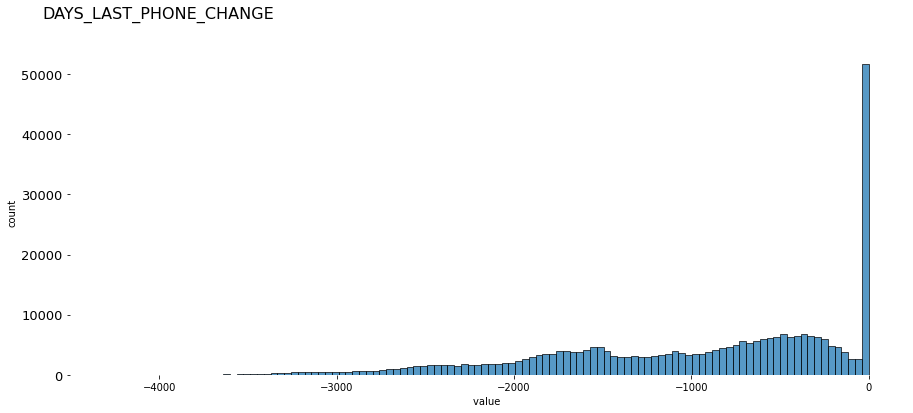

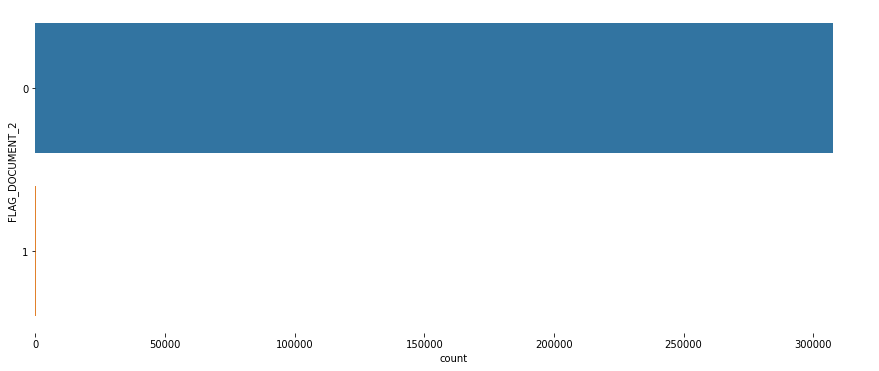

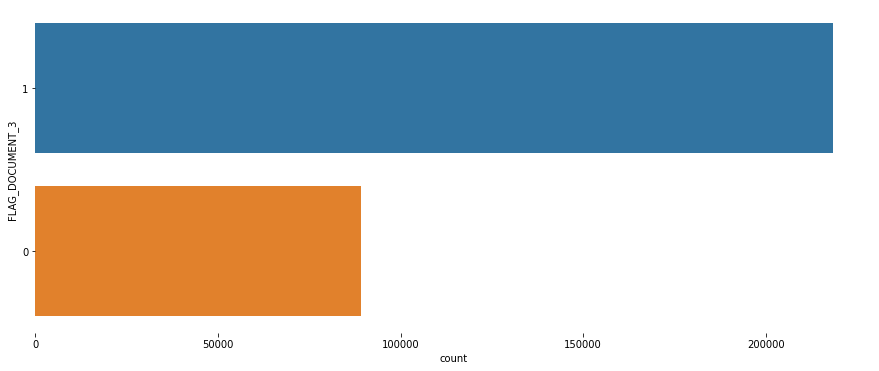

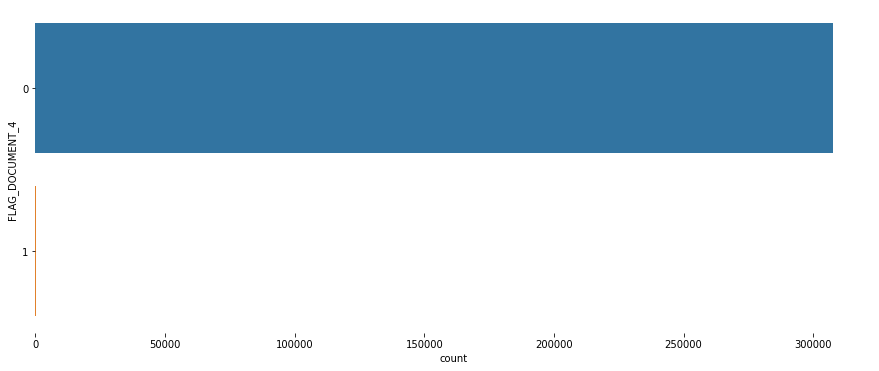

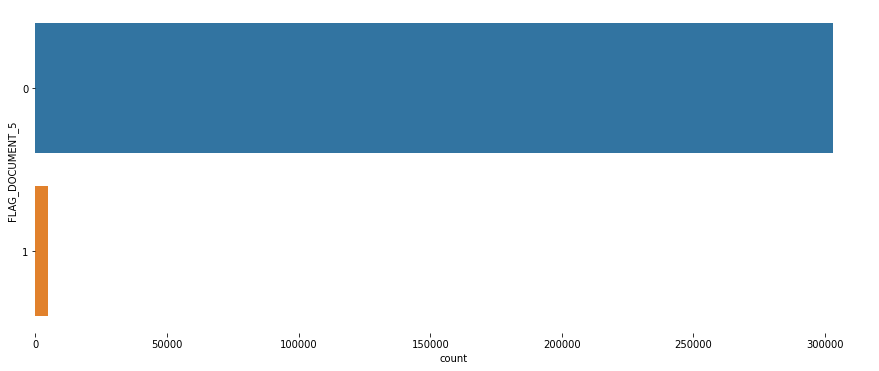

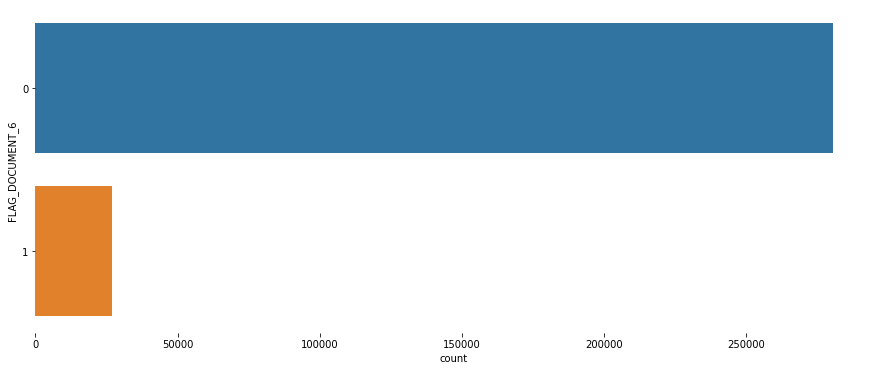

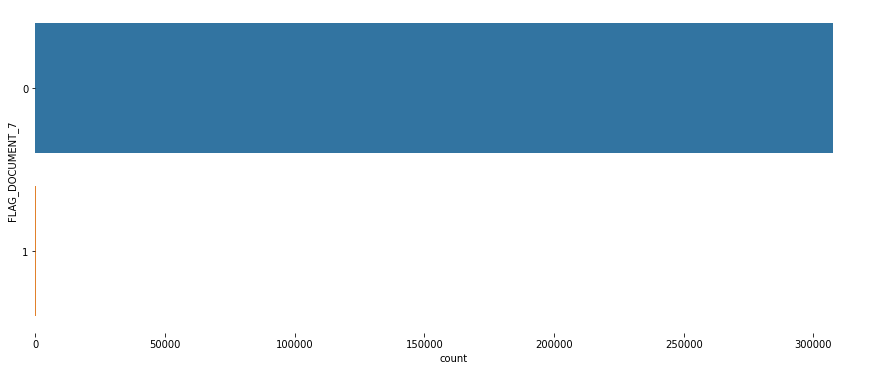

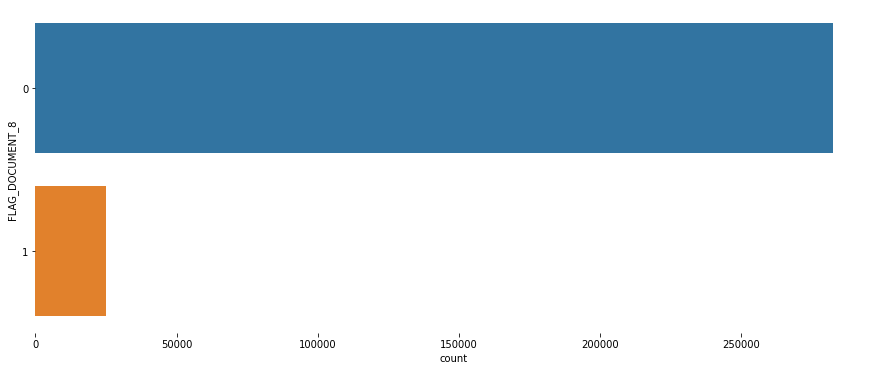

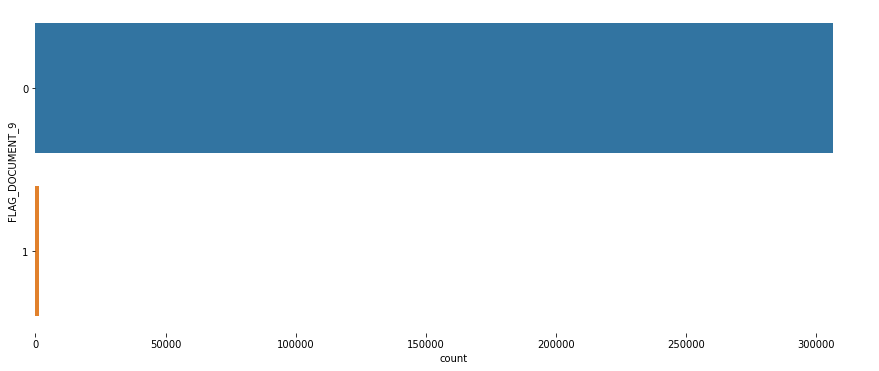

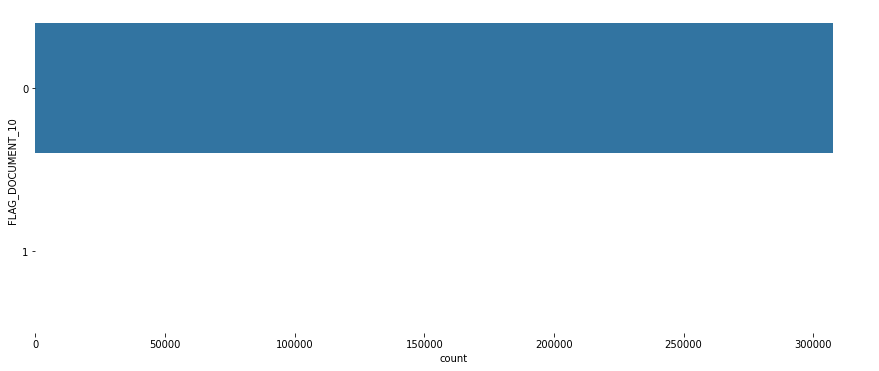

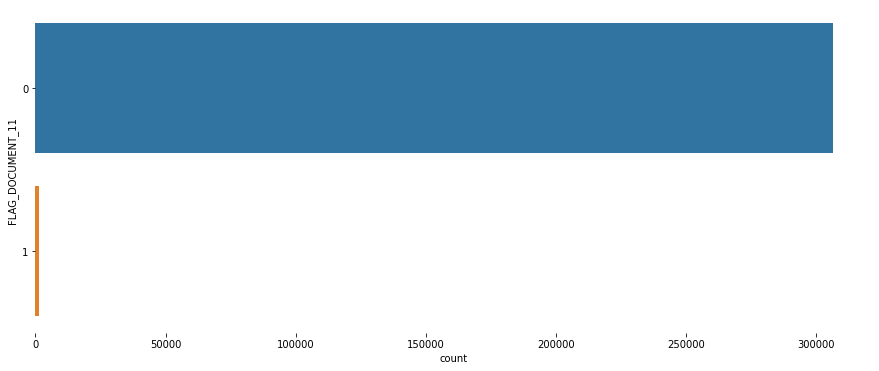

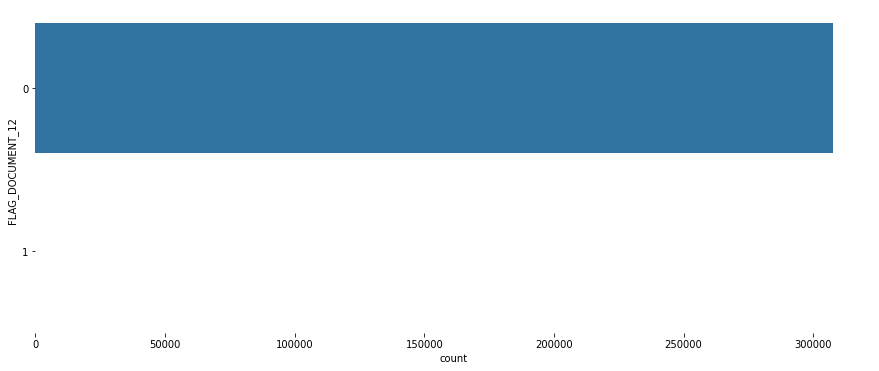

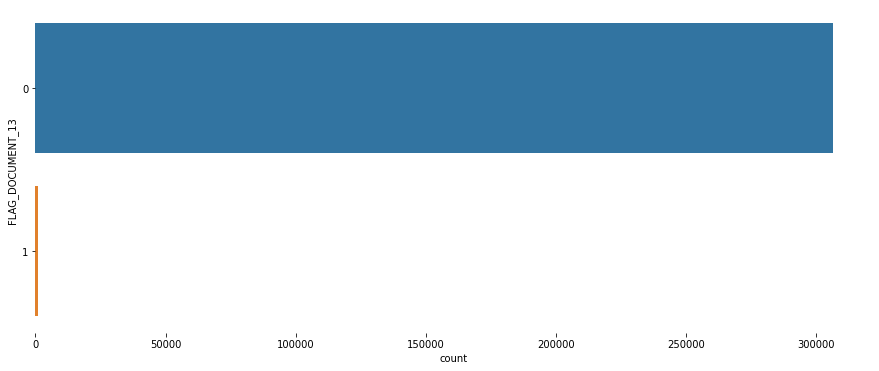

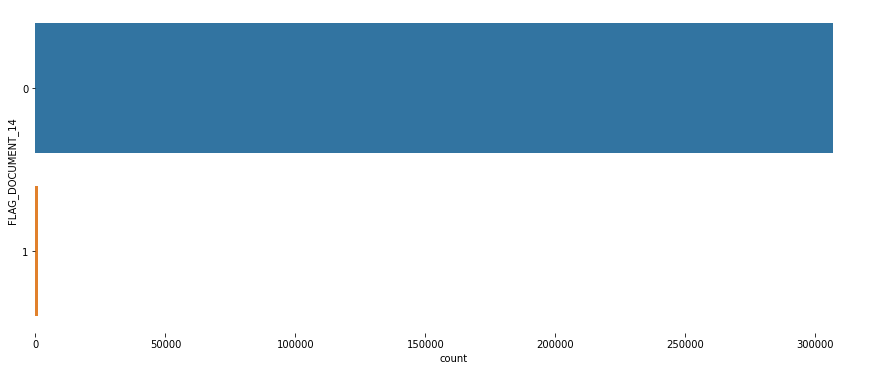

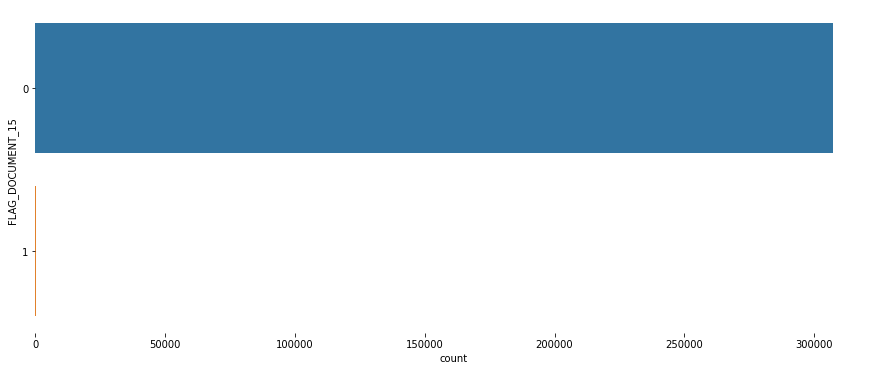

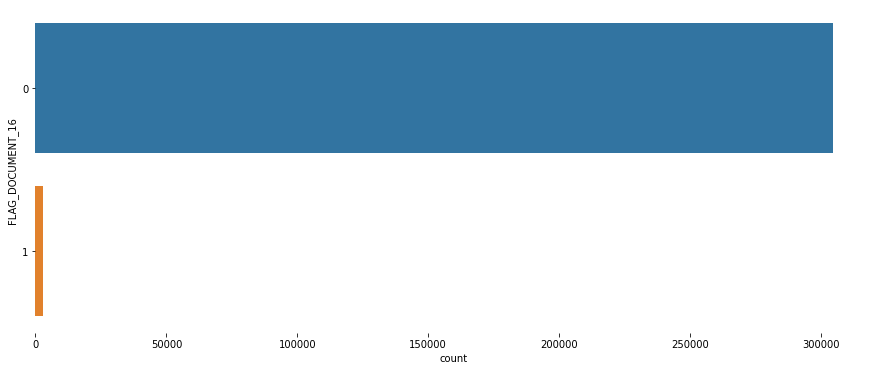

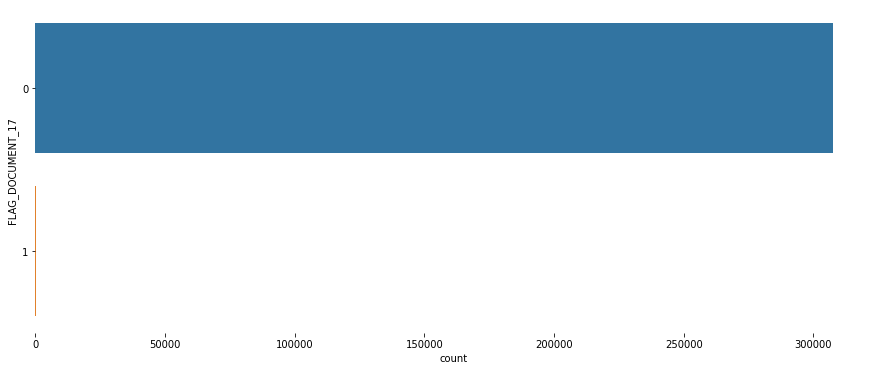

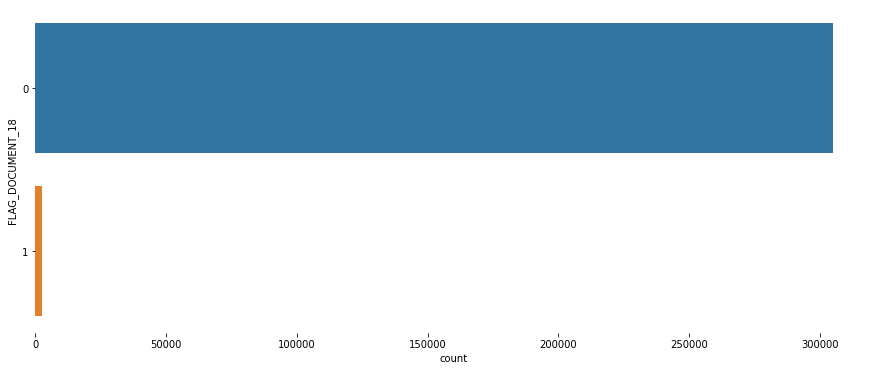

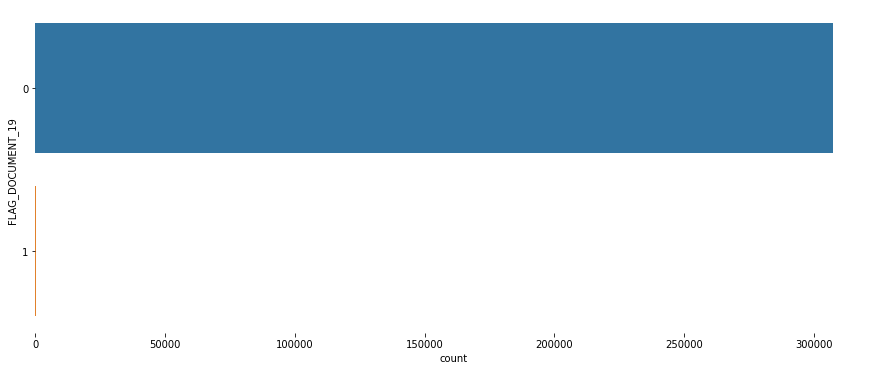

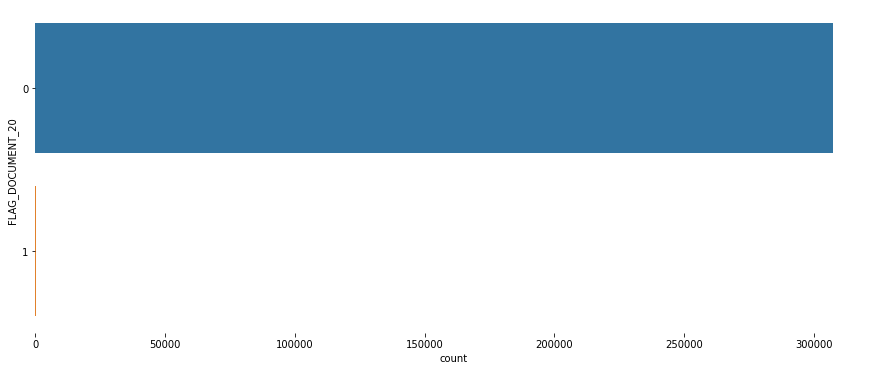

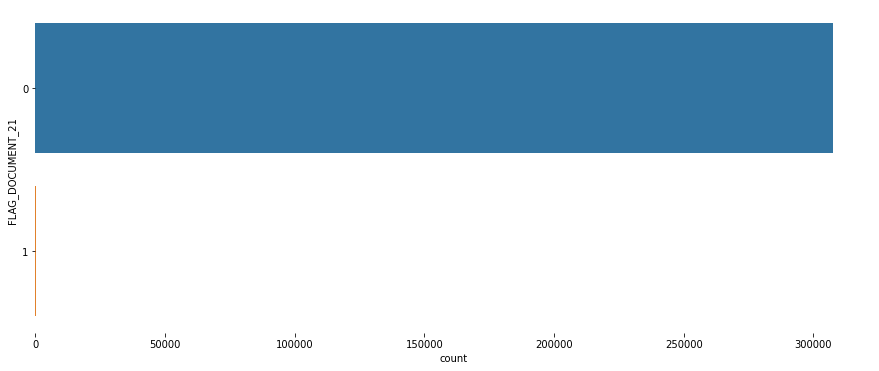

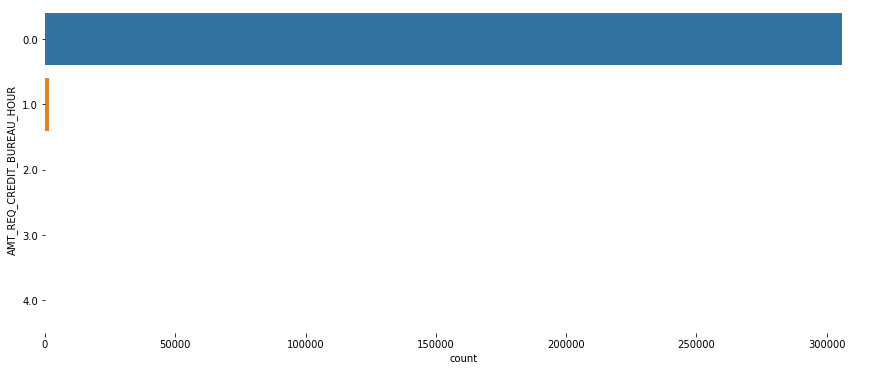

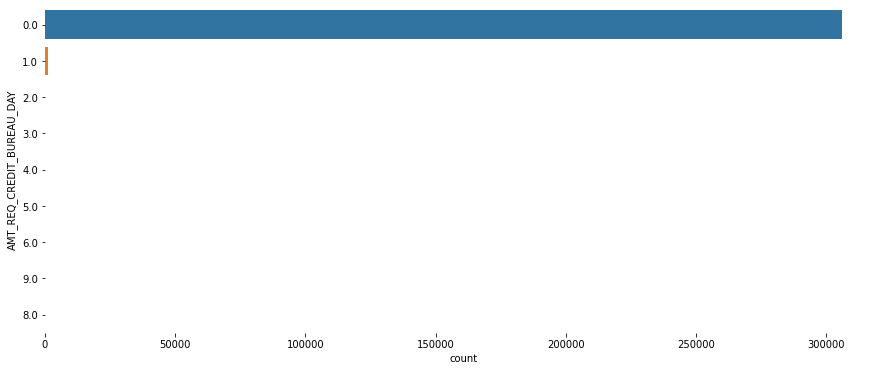

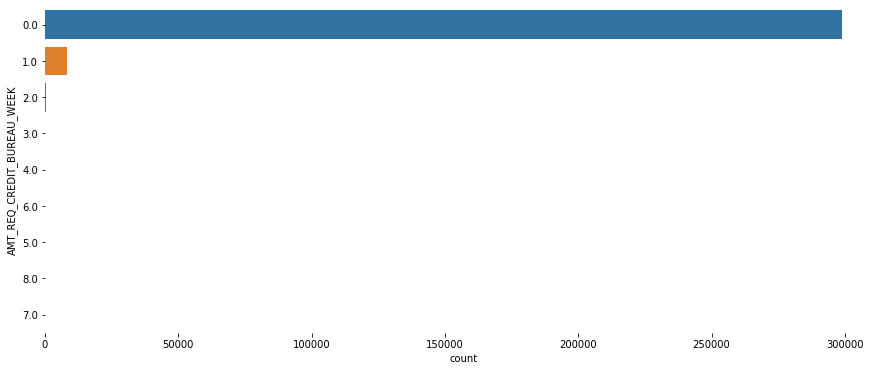

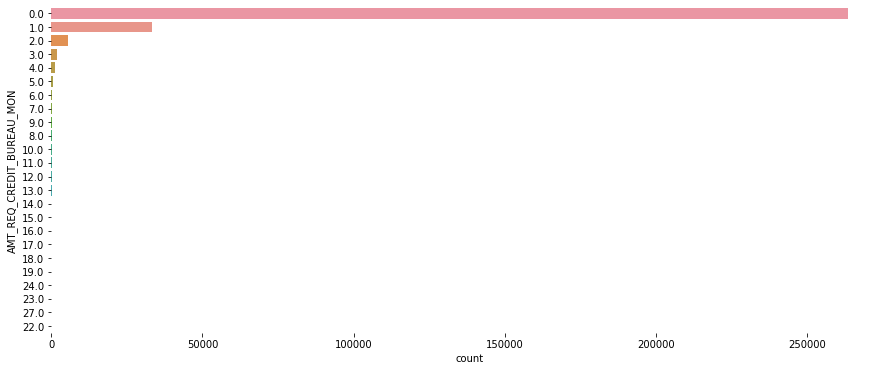

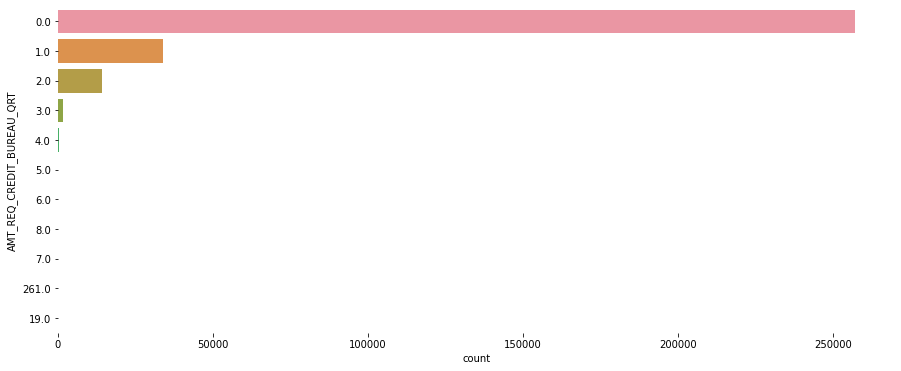

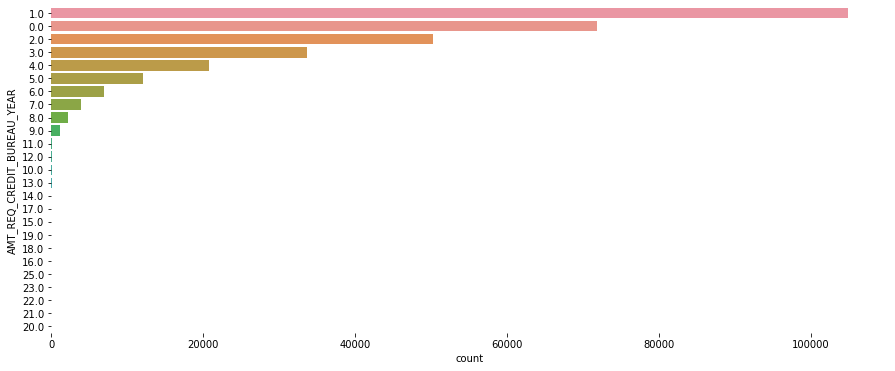

In [13]:
for col in floats:
    
    fig, ax = plt.subplots(1,1, figsize=(15, 6))
    #print(app_train[col].nunique(),col)
    if app_train[col].nunique() > 100:

        sns.histplot(app_train[col]);
    
        fig.text(0.1, 0.95, f'{col}', fontsize=16)
        plt.xlabel('value ', fontsize=10)
        plt.ylabel('count',fontsize=10)
        plt.yticks(fontsize=13)
    else:
        sns.countplot(y = app_train[col][1:], data = app_train.iloc[1:],order=app_train[col][1:].value_counts().index)
    plt.box(False)

In [14]:
num0 = len(app_train[(app_train.TARGET == 0)].index)
num1 = len(app_train[(app_train.TARGET == 1)].index)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

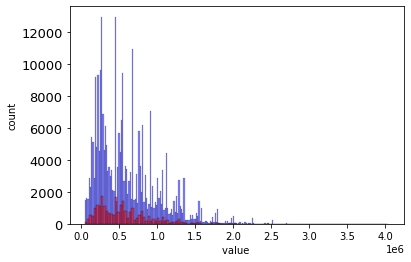

In [15]:
    #print(app_train[col].nunique(),col)
col = "AMT_CREDIT"

sns.histplot(app_train[(app_train.TARGET == 0)][col],color = 'blue',alpha = 0.5);
sns.histplot(app_train[(app_train.TARGET == 1)][col],color = 'red',alpha=0.5);


fig.text(0.1, 0.95, f'{col}', fontsize=16)
plt.xlabel('value ', fontsize=10)
plt.ylabel('count',fontsize=10)
plt.yticks(fontsize=13)

557778.527673716

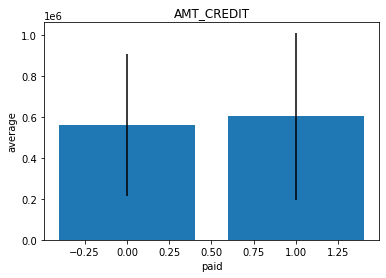

In [16]:
col = "AMT_CREDIT"
plt.title(col)
plt.ylabel("average")
plt.xlabel("paid")
#plt.legend(loc='upper right')
plt.bar(app_train["TARGET"].unique(),
        app_train[["TARGET",col]].groupby("TARGET").mean()[col],
        yerr=app_train[["TARGET",col]].groupby("TARGET").std()[col]);
plt.rcParams['figure.figsize'] = [15, 5]
app_train[(app_train.TARGET == 1)][col].iloc[:].mean()


In [17]:
from scipy.stats import ttest_ind
for col in floats:
    print(col)
    print(ttest_ind(app_train[(app_train.TARGET == 0)][col].iloc[:],app_train[(app_train.TARGET == 1)][col].iloc[:],equal_var=False))
    print("*****************")

SK_ID_CURR
Ttest_indResult(statistic=1.1734598125404352, pvalue=0.24062097113479677)
*****************
TARGET
Ttest_indResult(statistic=-inf, pvalue=0.0)
*****************
CNT_CHILDREN
Ttest_indResult(statistic=-10.19142893286495, pvalue=2.381145842902697e-24)
*****************
AMT_INCOME_TOTAL
Ttest_indResult(statistic=0.7306653940270041, pvalue=0.464990427440257)
*****************
AMT_CREDIT
Ttest_indResult(statistic=19.273175042266935, pvalue=2.72191069717545e-82)
*****************
AMT_ANNUITY
Ttest_indResult(statistic=8.146224597888224, pvalue=3.8934166378627594e-16)
*****************
AMT_GOODS_PRICE
Ttest_indResult(statistic=25.599007299494577, pvalue=4.584088554134329e-143)
*****************
REGION_POPULATION_RELATIVE
Ttest_indResult(statistic=23.626700525230323, pvalue=2.446248919385087e-122)
*****************
DAYS_BIRTH
Ttest_indResult(statistic=-45.0061879612696, pvalue=0.0)
*****************
DAYS_EMPLOYED
Ttest_indResult(statistic=28.962056469038913, pvalue=4.919698909895552e

Ttest_indResult(statistic=-5.2226339018907355, pvalue=1.7759370368028567e-07)
*****************
DEF_60_CNT_SOCIAL_CIRCLE
Ttest_indResult(statistic=-14.926070811966376, pvalue=3.4840603261765427e-50)
*****************
DAYS_LAST_PHONE_CHANGE
Ttest_indResult(statistic=-33.12677442977317, pvalue=2.029426426103111e-236)
*****************
FLAG_DOCUMENT_2
Ttest_indResult(statistic=-1.5911677361310141, pvalue=0.11158413474999233)
*****************
FLAG_DOCUMENT_3
Ttest_indResult(statistic=-26.62543827352595, pvalue=2.059514502404942e-154)
*****************
FLAG_DOCUMENT_4
Ttest_indResult(statistic=5.000212263900729, pvalue=5.730139398056463e-07)
*****************
FLAG_DOCUMENT_5
Ttest_indResult(statistic=0.1757873728720717, pvalue=0.8604622008551104)
*****************
FLAG_DOCUMENT_6
Ttest_indResult(statistic=18.4942929354752, pvalue=5.806640129877058e-76)
*****************
FLAG_DOCUMENT_7
Ttest_indResult(statistic=1.0352938669622231, pvalue=0.3005394138995378)
*****************
FLAG_DOCUMENT_

In [18]:
app_train.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000431,-0.000258,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002517,-0.002066,0.001879,0.000328,0.000809,0.004071
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012815,-0.039623,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,-0.000074,0.001701,-0.001306,-0.014794,-0.005833,0.012161
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021377,-0.001856,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,0.000159,0.000107,-0.001083,-0.007983,-0.004913,-0.034874
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159632,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.001432,0.003481,0.003950,0.026746,0.007924,0.015821
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770127,0.986734,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.002366,0.005028,0.001634,0.055536,0.020379,-0.036634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.002066,0.001701,0.000107,0.003481,0.005028,0.002286,0.005442,0.001160,0.001018,0.000309,...,0.012956,0.001154,0.000078,-0.001076,0.230873,1.000000,0.218370,-0.002750,-0.001551,0.000742
AMT_REQ_CREDIT_BUREAU_WEEK,0.001879,-0.001306,-0.001083,0.003950,0.001634,0.013494,0.001880,-0.002335,-0.004014,0.002505,...,-0.003666,-0.001006,-0.001239,-0.000057,0.006422,0.218370,1.000000,-0.007423,-0.007466,0.029318
AMT_REQ_CREDIT_BUREAU_MON,0.000328,-0.014794,-0.007983,0.026746,0.055536,0.037171,0.057337,0.071630,-0.003580,-0.032416,...,-0.000179,-0.002230,0.002177,-0.003489,0.002973,-0.002750,-0.007423,1.000000,0.005318,0.013708
AMT_REQ_CREDIT_BUREAU_QRT,0.000809,-0.005833,-0.004913,0.007924,0.020379,0.010685,0.020811,-0.001873,-0.016281,0.013466,...,-0.003362,-0.001079,0.000034,-0.002066,0.000725,-0.001551,-0.007466,0.005318,1.000000,0.095723


In [19]:
corr_ = app_train.corr().abs().unstack()
corr_.sort_values(ascending = False)

SK_ID_CURR        SK_ID_CURR              1.000000e+00
FLOORSMAX_MODE    FLOORSMAX_MODE          1.000000e+00
EXT_SOURCE_1      EXT_SOURCE_1            1.000000e+00
EXT_SOURCE_2      EXT_SOURCE_2            1.000000e+00
EXT_SOURCE_3      EXT_SOURCE_3            1.000000e+00
                                              ...     
FLAG_DOCUMENT_17  LIVINGAPARTMENTS_AVG    3.885484e-06
FLAG_DOCUMENT_4   TOTALAREA_MODE          1.099788e-06
TOTALAREA_MODE    FLAG_DOCUMENT_4         1.099788e-06
FLAG_DOCUMENT_10  FLOORSMAX_MEDI          7.697476e-07
FLOORSMAX_MEDI    FLAG_DOCUMENT_10        7.697476e-07
Length: 11236, dtype: float64

In [20]:
correlated = ["FLAG_EMP_PHONE","YEARS_BUILD_AVG","OBS_30_CNT_SOCIAL_CIRCLE","FLOORSMIN_AVG",
             "FLOORSMAX_AVG","ENTRANCES_AVG","ELEVATORS_AVG","COMMONAREA_AVG","LIVINGAREA_AVG",
              "APARTMENTS_AVG","BASEMENTAREA_AVG","LIVINGAPARTMENTS_AVG","YEARS_BEGINEXPLUATATION_AVG",
             "LANDAREA_AVG", "NONLIVINGAREA_AVG","NONLIVINGAPARTMENTS_AVG","YEARS_BUILD_MODE","FLOORSMAX_MODE",
             "AMT_GOODS_PRICE","FLOORSMAX_MODE","ELEVATORS_MODE","LANDAREA_MODE","COMMONAREA_MODE",
              "NONLIVINGAPARTMENTS_MODE","COMMONAREA_MODE","BASEMENTAREA_MODE","APARTMENTS_MODE",
             "NONLIVINGAREA_MODE","ENTRANCES_MODE","LIVINGAPARTMENTS_MODE","LIVINGAREA_MODE","LANDAREA_MODE",
             "APARTMENTS_MODE","BASEMENTAREA_MODE","LIVINGAREA_MODE","YEARS_BEGINEXPLUATATION_MODE",
             "LIVINGAPARTMENTS_MODE","NONLIVINGAPARTMENTS_MODE","NONLIVINGAREA_MODE","YEARS_BEGINEXPLUATATION_MODE",
             "REGION_RATING_CLIENT"]

In [21]:
print(len(correlated))
corr_targ = app_train.corr()["TARGET"].abs()
corr_targ.sort_values(ascending = True)

names = list(corr_targ.index)
for i in range(len(names)):
    if abs(corr_targ[i]) < 0.01:
        correlated.append(names[i])
print(len(correlated))

41
78


## Bureau

In [22]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [23]:
bureau.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [24]:
for col in bureau.describe().columns:
    bureau[col] = bureau[col].fillna(value = bureau[col].median())
bureau.isnull().sum()

SK_ID_CURR                0
SK_ID_BUREAU              0
CREDIT_ACTIVE             0
CREDIT_CURRENCY           0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
DAYS_CREDIT_ENDDATE       0
DAYS_ENDDATE_FACT         0
AMT_CREDIT_MAX_OVERDUE    0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_LIMIT      0
AMT_CREDIT_SUM_OVERDUE    0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        0
AMT_ANNUITY               0
dtype: int64

In [25]:
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,0.0,0,91323.00,0.0,0.0,0.0,Consumer credit,-131,0.0
1,215354,5714463,Active,currency 1,-208,0,1075.0,-897.0,0.0,0,225000.00,171342.0,0.0,0.0,Credit card,-20,0.0
2,215354,5714464,Active,currency 1,-203,0,528.0,-897.0,0.0,0,464323.50,0.0,0.0,0.0,Consumer credit,-16,0.0
3,215354,5714465,Active,currency 1,-203,0,-330.0,-897.0,0.0,0,90000.00,0.0,0.0,0.0,Credit card,-16,0.0
4,215354,5714466,Active,currency 1,-629,0,1197.0,-897.0,77674.5,0,2700000.00,0.0,0.0,0.0,Consumer credit,-21,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,-897.0,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,0.0
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,0.0
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,0.0,0,15570.00,0.0,0.0,0.0,Consumer credit,-967,0.0
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,0.0,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,0.0


In [26]:
bureau.groupby("SK_ID_CURR")["DAYS_CREDIT"].median()

SK_ID_CURR
100001    -857.0
100002   -1042.5
100003   -1205.5
100004    -867.0
100005    -137.0
           ...  
456249   -1680.0
456250    -824.0
456253    -919.0
456254   -1104.0
456255   -1020.0
Name: DAYS_CREDIT, Length: 305811, dtype: float64

In [27]:
tmp = app_train.join(bureau, on = "SK_ID_CURR",rsuffix="_bureau")

In [28]:
for col in bureau.describe(include="float64").columns:
    print(col)
    
    print("True:",tmp[(tmp.TARGET ==1)].groupby("SK_ID_CURR")[col].median().sum(),tmp[(tmp.TARGET ==1)].groupby("SK_ID_CURR")[col].median().std())
    print("False:",tmp[(tmp.TARGET ==0)].groupby("SK_ID_CURR")[col].median().sum(),tmp[(tmp.TARGET ==0)].groupby("SK_ID_CURR")[col].median().std())
    print("***************************")





DAYS_CREDIT_ENDDATE
True: 11183524.0 4785.273985139574
False: 134271380.0 4880.319319524163
***************************
DAYS_ENDDATE_FACT
True: -23934183.0 567.4785047693989
False: -273866933.0 572.5260177989587
***************************
AMT_CREDIT_MAX_OVERDUE
True: 21754700.549999997 9169.101903475947
False: 321618680.56799996 31812.01199350044
***************************
AMT_CREDIT_SUM
True: 8653747900.725 916496.1061581279
False: 100567779571.215 920514.9334632116
***************************
AMT_CREDIT_SUM_DEBT
True: 2938968233.64 705065.878040093
False: 33443306384.625 600039.1385966223
***************************
AMT_CREDIT_SUM_LIMIT
True: 90847517.4 31059.633494192254
False: 1092608583.1110003 34352.9667843316
***************************
AMT_CREDIT_SUM_OVERDUE
True: 257967.49500000002 583.9975112998455
False: 10937741.4 6383.208418541727
***************************
AMT_ANNUITY
True: 657409302.0 12450.676999458861
False: 7678748902.5 14658.0034508355
***************************


In [29]:
bureau.groupby("SK_ID_CURR")["DAYS_CREDIT_ENDDATE"].mean()
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,0.0,0,91323.00,0.0,0.0,0.0,Consumer credit,-131,0.0
1,215354,5714463,Active,currency 1,-208,0,1075.0,-897.0,0.0,0,225000.00,171342.0,0.0,0.0,Credit card,-20,0.0
2,215354,5714464,Active,currency 1,-203,0,528.0,-897.0,0.0,0,464323.50,0.0,0.0,0.0,Consumer credit,-16,0.0
3,215354,5714465,Active,currency 1,-203,0,-330.0,-897.0,0.0,0,90000.00,0.0,0.0,0.0,Credit card,-16,0.0
4,215354,5714466,Active,currency 1,-629,0,1197.0,-897.0,77674.5,0,2700000.00,0.0,0.0,0.0,Consumer credit,-21,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,-897.0,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,0.0
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,0.0
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,0.0,0,15570.00,0.0,0.0,0.0,Consumer credit,-967,0.0
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,0.0,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,0.0


## bureau_balance

In [30]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [31]:
tmp_bureau = bureau.join(bureau_balance,on = "SK_ID_BUREAU", rsuffix="_balance")

In [32]:
bureau_balance.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

## credit_card_balance

In [33]:
credit_card_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [34]:
credit_card_balance.groupby("SK_ID_CURR").head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823349,1125997,145265,-6,0.000,382500,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3823381,2538077,121701,-2,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3823417,2702735,323731,-2,0.000,67500,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3823426,2180973,122120,-4,0.000,90000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [35]:
credit_card_balance.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [36]:
for col in credit_card_balance.describe().columns:
    credit_card_balance[col] = credit_card_balance[col].fillna(credit_card_balance[col].median())
credit_card_balance.isnull().sum()
    

SK_ID_PREV                    0
SK_ID_CURR                    0
MONTHS_BALANCE                0
AMT_BALANCE                   0
AMT_CREDIT_LIMIT_ACTUAL       0
AMT_DRAWINGS_ATM_CURRENT      0
AMT_DRAWINGS_CURRENT          0
AMT_DRAWINGS_OTHER_CURRENT    0
AMT_DRAWINGS_POS_CURRENT      0
AMT_INST_MIN_REGULARITY       0
AMT_PAYMENT_CURRENT           0
AMT_PAYMENT_TOTAL_CURRENT     0
AMT_RECEIVABLE_PRINCIPAL      0
AMT_RECIVABLE                 0
AMT_TOTAL_RECEIVABLE          0
CNT_DRAWINGS_ATM_CURRENT      0
CNT_DRAWINGS_CURRENT          0
CNT_DRAWINGS_OTHER_CURRENT    0
CNT_DRAWINGS_POS_CURRENT      0
CNT_INSTALMENT_MATURE_CUM     0
NAME_CONTRACT_STATUS          0
SK_DPD                        0
SK_DPD_DEF                    0
dtype: int64

## installments_payments

In [37]:
installments_payments

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [38]:
installments_payments.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [39]:
for col in installments_payments.describe().columns:
    installments_payments[col] = installments_payments[col].fillna(installments_payments[col].median())
installments_payments.isnull().sum()

SK_ID_PREV                0
SK_ID_CURR                0
NUM_INSTALMENT_VERSION    0
NUM_INSTALMENT_NUMBER     0
DAYS_INSTALMENT           0
DAYS_ENTRY_PAYMENT        0
AMT_INSTALMENT            0
AMT_PAYMENT               0
dtype: int64

## POS_CASH_balance

In [40]:
POS_CASH_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


In [41]:
POS_CASH_balance.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [42]:
for col in POS_CASH_balance.describe().columns:
    POS_CASH_balance[col] = POS_CASH_balance[col].fillna(POS_CASH_balance[col].median())
POS_CASH_balance.isnull().sum()


SK_ID_PREV               0
SK_ID_CURR               0
MONTHS_BALANCE           0
CNT_INSTALMENT           0
CNT_INSTALMENT_FUTURE    0
NAME_CONTRACT_STATUS     0
SK_DPD                   0
SK_DPD_DEF               0
dtype: int64

## Home Credit

In [43]:
HomeCredit_columns_description = pd.DataFrame(HomeCredit_columns_description)
pd.set_option('display.max_columns', None)
HomeCredit_columns_description

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


In [44]:
HomeCredit_columns_description[(HomeCredit_columns_description.Row == "TARGET")]["Description"].iloc[:].to_string()

'1    Target variable (1 - client with payment diffi...'

# Models

In [239]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_ind, test_ind in split.split(app_train,app_train["TARGET"]):
    train_list = train_ind
    test_list = test_ind

In [240]:
set_ = app_train.copy()
set_ = set_.join(bureau_balance, on ="SK_ID_CURR", rsuffix = "_bb")
set_ = set_.join(bureau, on = "SK_ID_CURR",rsuffix="_bureau")
set_ = set_.join(credit_card_balance, on = "SK_ID_CURR",rsuffix="_cc_balance")
set_ = set_.join(installments_payments, on = "SK_ID_CURR",rsuffix="_inst_pay")
set_ = set_.join(POS_CASH_balance, on = "SK_ID_CURR",rsuffix="_pos")
#train_data, test_data, train_target, test_target = set_.iloc[train_ind], set_.iloc[test_ind], set_["TARGET"].iloc[train_ind], set_["TARGET"].iloc[test_ind] 


In [48]:
cols_object_ord=[]
cols_object_hot=[]
cols_int = []
cols_float = []
cols_rest = []
for col in set_.columns:
    if set_[col].dtype == "object":
        if set_[col].nunique()<5:
            cols_object_ord.append(col)
        else:
            cols_object_hot.append(col)
    elif set_[col].dtype == "int64":
        cols_int.append(col)
    elif set_[col].dtype == "float64":
        cols_float.append(col)
        
    else:
        rest.append(col)
print(cols_object_ord)
print(cols_object_hot)
print(cols_int)
print(cols_float)
print(cols_rest)
        

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY']
['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'WALLSMATERIAL_MODE', 'STATUS', 'CREDIT_TYPE', 'NAME_CONTRACT_STATUS', 'NAME_CONTRACT_STATUS_pos']
['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7

In [49]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [51]:
drop = correlated
drop.append("SK_ID_CURR")
drop.append("TARGET")
#drop = []

In [241]:
pipe = [('standard_scaler',StandardScaler(),cols_float),("categorical",OneHotEncoder(),cols_object_hot),
       ("binary",OrdinalEncoder(),cols_object_ord),("drop","drop",drop)]
#pipe = [('standard_scaler',StandardScaler(),cols_float),("categorical",OrdinalEncoder(),cols_object_hot),
#        ("binary",OrdinalEncoder(),cols_object_ord),("drop","drop",drop)]
#pipe = [("categorical",OrdinalEncoder(),cols_object_hot),
#        ("binary",OrdinalEncoder(),cols_object_ord),("drop","drop",drop)]
full_pipe = ColumnTransformer(pipe,remainder='passthrough')

In [242]:
set_.info()
data = full_pipe.fit_transform(set_)
train_trans = data[train_ind]
test_trans = data[test_ind]
train_target = set_["TARGET"].iloc[train_ind]
test_target = set_["TARGET"].iloc[test_ind]
print(train_trans.shape,test_trans.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 181 entries, SK_ID_CURR to SK_DPD_DEF_pos
dtypes: float64(95), int64(64), object(22)
memory usage: 424.6+ MB
(246008, 303) (61503, 303)


In [211]:
def change_sample(x,y,ratio):
    index = []
    max_ = y.value_counts()[1]
    c=0
    #print(max_)
    index = np.array([],dtype="int64")
    for i in range(len(y)):
        if y.iloc[i] == 1:
            index = np.append(index, y.index[i])
            
        elif c < (max_*ratio):
            index = np.append(index, y.index[i])
           # print(c)
            c+=1
    return index

In [212]:
ind_ = change_sample(train_trans,train_target,1)
#train_target.value_counts()

In [ ]:
train_trans = data[ind_]
train_target = set_["TARGET"].iloc[ind_]

In [55]:
def print_scores(y,y_pred):
    print("Recall:", recall_score(y,y_pred))
    print("Precision:", precision_score(y,y_pred))
    print("Accuracy:", accuracy_score(y,y_pred))

## Logistic regression

In [64]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1e4,solver='lbfgs',class_weight="balanced",verbose=1)

In [243]:
log_reg.fit(train_trans,train_target)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          304     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70520D+05    |proj g|=  1.44459D+09

At iterate   50    f=  1.69300D+05    |proj g|=  4.86542D+08

At iterate  100    f=  1.68117D+05    |proj g|=  4.98965D+09

At iterate  150    f=  1.67779D+05    |proj g|=  6.34324D+07

At iterate  200    f=  1.67778D+05    |proj g|=  1.82700D+07

At iterate  250    f=  1.67777D+05    |proj g|=  4.17037D+07

At iterate  300    f=  1.67774D+05    |proj g|=  7.43929D+08

At iterate  350    f=  1.67696D+05    |proj g|=  1.36939D+09

At iterate  400    f=  1.67591D+05    |proj g|=  8.28252D+08

At iterate  450    f=  1.67586D+05    |proj g|=  3.87932D+07

At iterate  500    f=  1.67584D+05    |proj g|=  5.03913D+07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.8s finished


LogisticRegression(class_weight='balanced', max_iter=10000.0, verbose=1)

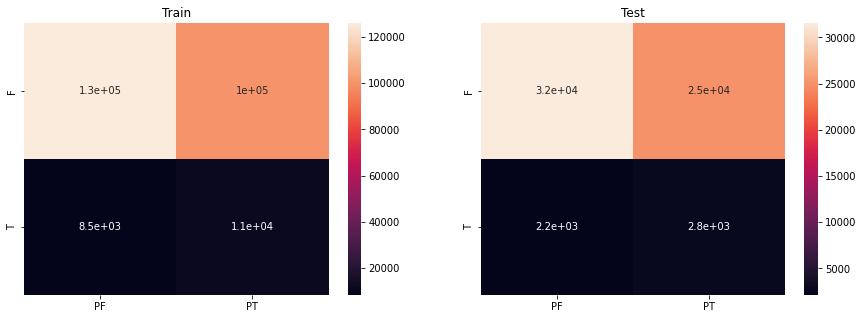

In [244]:
plot_confusion(log_reg)

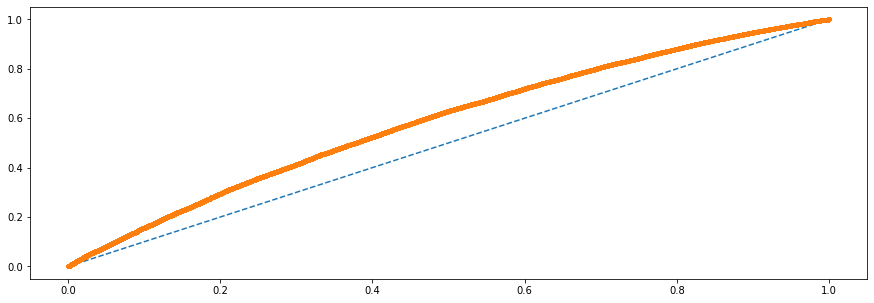

In [245]:
yhat = log_reg.predict_proba(train_trans)
fpr, tpr, thresholds = roc_curve(train_target,yhat[:,1])
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')

In [246]:
print_scores(train_target,log_reg.predict(train_trans))

Recall: 0.570392749244713
Precision: 0.10154177124417355
Accuracy: 0.5578842964456441


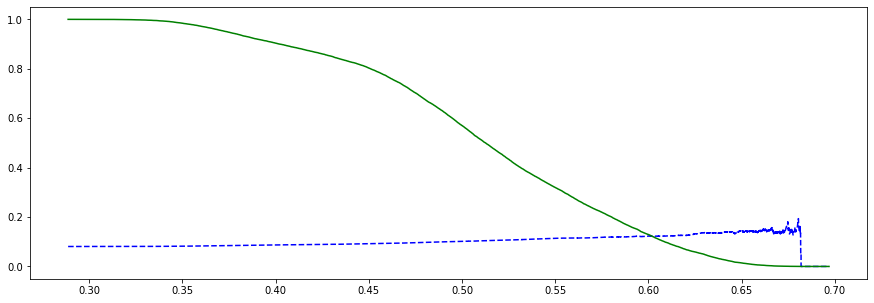

In [247]:
precision, recall, thresholds = precision_recall_curve(train_target,yhat[:,1])
plot_prec_recall(precision,recall,thresholds)

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
rf = RandomForestClassifier(n_estimators = 100, max_depth= 10,random_state = 50, verbose = 1, n_jobs = -1,class_weight="balanced")

In [269]:
rf.fit(train_trans,train_target)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.5s finished


RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=20, n_jobs=-1, random_state=50, verbose=1)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished


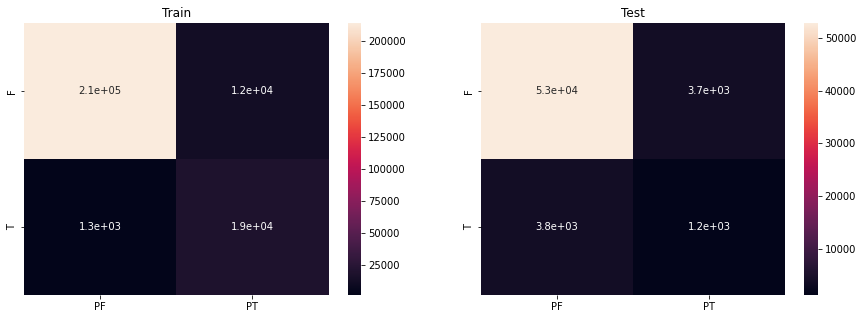

In [270]:
plot_confusion(rf)

In [271]:
print_scores(test_target,rf.predict(test_trans))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s


Recall: 0.24390735146022155
Precision: 0.24653908794788273
Accuracy: 0.8787864006633823


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished


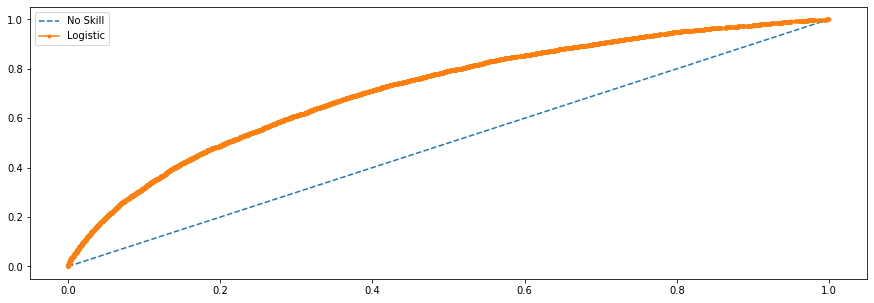

In [272]:
yhat = rf.predict_proba(test_trans)
fpr, tpr, thresholds = roc_curve(test_target,yhat[:,1])
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.legend(loc="upper left")

In [265]:
def plot_prec_recall(p,r,t):
    plt.plot(t,p[:-1],"b--",label="precision")
    plt.plot(t,r[:-1],"g-",label="recall")
    plt.legend(loc="upper left")
    plt.show() 
def plot_many(p,r,t):
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    for i in range(len(p)):
        plt.plot(t[i],p[i][1:],color=colors[i],label=str(i)+" p")
        plt.plot(t[i],r[i][1:],color=colors[i],label=str(i)+" r")
    plt.legend(loc="upper left")
    plt.show()

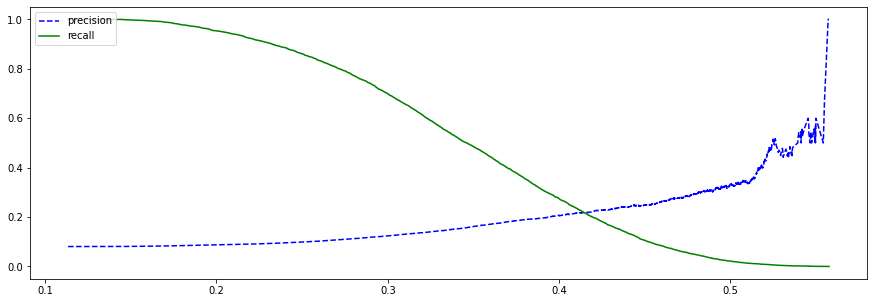

In [266]:
precision, recall, thresholds = precision_recall_curve(test_target,yhat[:,1])
plot_prec_recall(precision,recall,thresholds)

In [76]:
def adjust_thresh(y_probs,thresh):
    y = []
    for i in range(len(y_probs)):
        if y_probs[i] < thresh:
            y.append(0)
        else:
            y.append(1)
    return y

In [77]:
y_new = adjust_thresh(yhat[:,1],0.15)

In [78]:
print_scores(test_target,y_new)

Recall: 0.31373338703181636
Precision: 0.2139522109310629
Accuracy: 0.8515218522372529


In [142]:
param_grid = [{'max_depth':[10,15,20],'class_weight': ["balanced"]}]

grid_search_rf = GridSearchCV(rf, param_grid, cv=5,scoring='accuracy',return_train_score=True,verbose=1)
grid_search_rf.fit(train_trans,train_target)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10, n_jobs=-1,
                                              random_state=50, verbose=1),
             param_grid=[{'class_weight': ['balanced'],
                          'max_depth': [10, 15, 20]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [143]:
grid_search_rf.best_params_

{'class_weight': 'balanced', 'max_depth': 20}

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


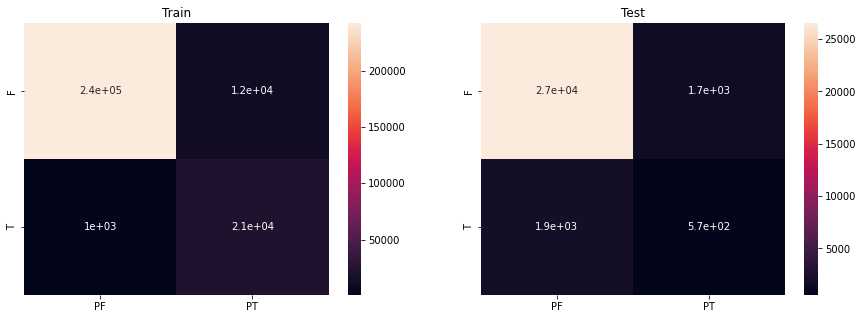

In [144]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.set_title("Train")
ax2.set_title("Test")
sns.heatmap(confusion_matrix(train_target,grid_search_rf.predict(train_trans)),
            xticklabels=["PF","PT"],
            yticklabels=["F","T"],
            annot=True,ax=ax1);
sns.heatmap(confusion_matrix(test_target,grid_search_rf.predict(test_trans)),
            xticklabels=["PF","PT"],
            yticklabels=["F","T"],
            annot=True,ax=ax2);

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


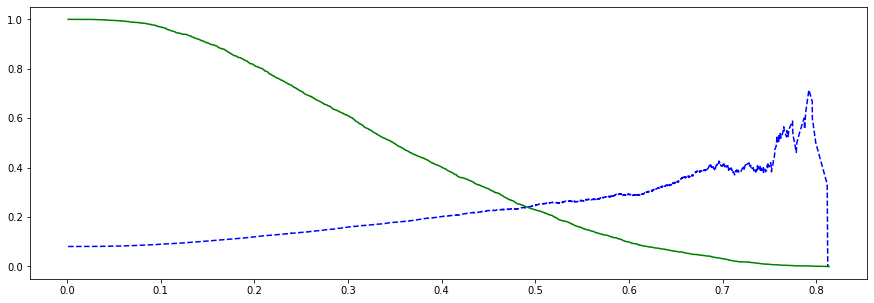

In [158]:
yhat = grid_search_rf.predict_proba(test_trans)
precision, recall, thresholds = precision_recall_curve(test_target,yhat[:,1])
plot_prec_recall(precision,recall,thresholds)

In [145]:
print_scores(test_target,grid_search_rf.predict(test_trans))

Recall: 0.22956101490132905
Precision: 0.2471812662619254
Accuracy: 0.8813410509885536


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


Max depth 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Max depth 5


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


Max depth 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


Max depth 20


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


Max depth 30


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


Max depth 40


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   23.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
/Users/christopherjohnson/Library/Python/3.8/lib/python/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

ValueError: x and y must have same first dimension, but have shapes (6,) and (30125,)

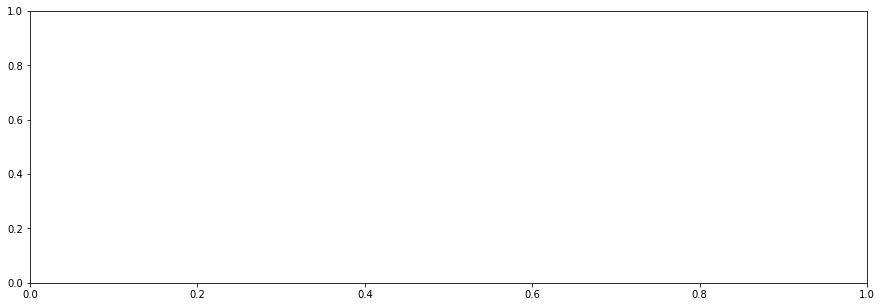

In [162]:
recalls, precisions, accuracys, thresh = [],[],[],[]
for n in [2,5,10,20,30,40]:
    print("Max depth",n)
    rf = RandomForestClassifier(n_estimators = 100, max_depth= n,random_state = 50, verbose = 1, n_jobs = -1,class_weight="balanced")
    rf.fit(train_trans,train_target)
    y = test_target
    y_pred = rf.predict(test_trans)
    #recalls.append(recall_score(y,y_pred))
    #precisions.append(precision_score(y,y_pred))
    accuracys.append(accuracy_score(y,y_pred))
    yhat = rf.predict_proba(test_trans)
    precision, recall, thresholds = precision_recall_curve(test_target,yhat[:,1])
    precisions.append(precision);recalls.append(recall);thresh.append(thresholds)

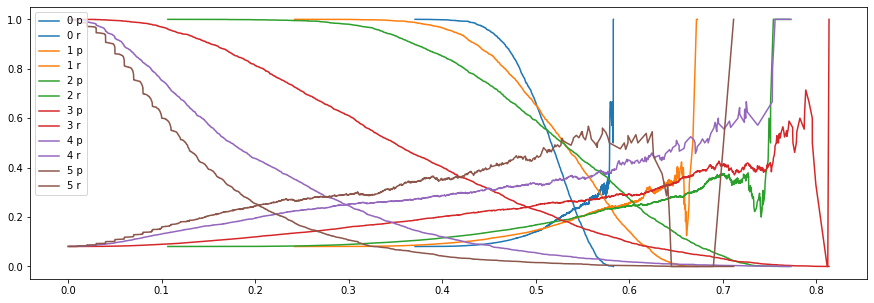

In [182]:
plot_many(precisions,recalls,thresh)

Estimators # 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


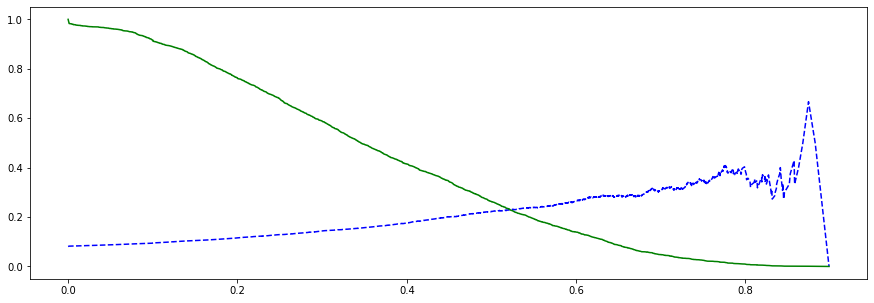

Estimators # 50


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.1s finished


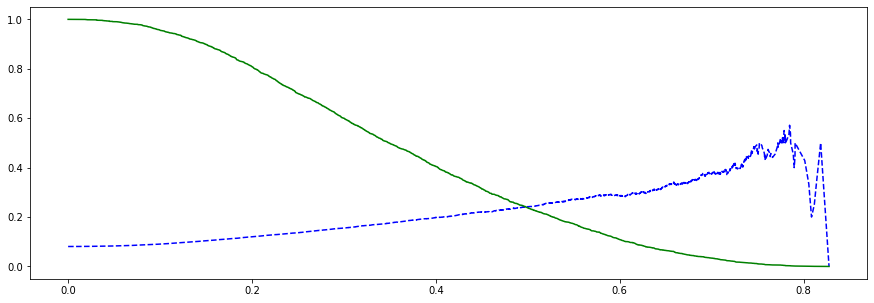

Estimators # 100


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


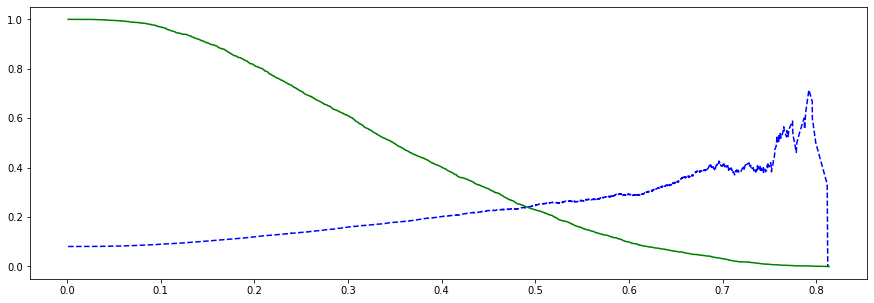

Estimators # 150


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   31.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.2s finished


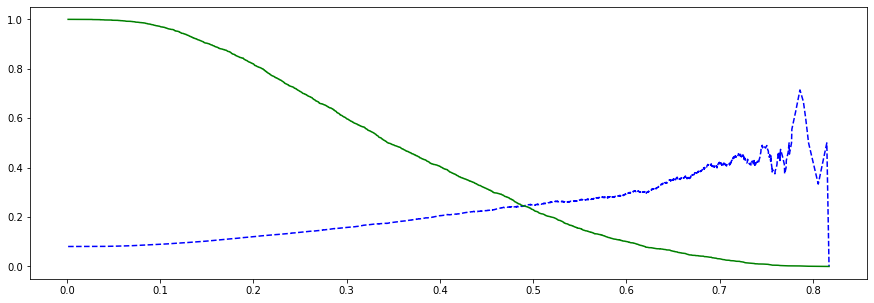

Estimators # 200


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   45.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.3s finished


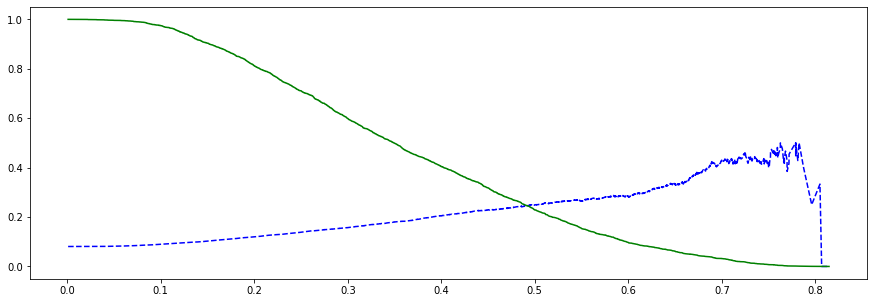

In [160]:
recalls, precisions, accuracys = [],[],[]
for n in [10,50,100,150,200]:
    print("Estimators #",n)
    rf = RandomForestClassifier(n_estimators = n, max_depth= 20,random_state = 50, verbose = 1, n_jobs = -1,class_weight="balanced")
    rf.fit(train_trans,train_target)
    y = test_target
    y_pred = rf.predict(test_trans)
    recalls.append(recall_score(y,y_pred))
    precisions.append(precision_score(y,y_pred))
    accuracys.append(accuracy_score(y,y_pred))
    yhat = rf.predict_proba(test_trans)
    precision, recall, thresholds = precision_recall_curve(test_target,yhat[:,1])
    plot_prec_recall(precision,recall,thresholds)

In [183]:
recalls, precisions, accuracys, thresh = [],[],[],[]
for n in ["gini", "entropy", "log_loss"]:
    print("Criterion",n)
    rf = RandomForestClassifier(criterion = n,n_estimators = 100, max_depth= 20,random_state = 50, verbose = 1, n_jobs = -1,class_weight="balanced")
    rf.fit(train_trans,train_target)
    y = test_target
    y_pred = rf.predict(test_trans)
    #recalls.append(recall_score(y,y_pred))
    #precisions.append(precision_score(y,y_pred))
    accuracys.append(accuracy_score(y,y_pred))
    yhat = rf.predict_proba(test_trans)
    precision, recall, thresholds = precision_recall_curve(test_target,yhat[:,1])
    precisions.append(precision);recalls.append(recall);thresh.append(thresholds)

Max depth gini


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


Max depth entropy


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


Max depth log_loss


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


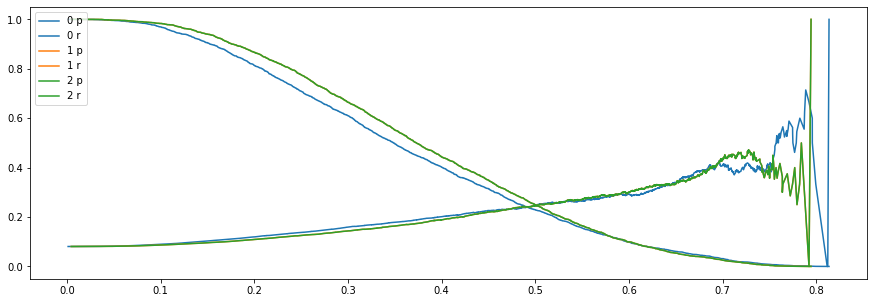

In [184]:
plot_many(precisions,recalls,thresh)

In [248]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_neighbors': [3,4,5], 'weights':
  ['distance']}]
#k_neigh = KNeighborsClassifier(n_neighbors=3,weights="distance")
k_neigh = KNeighborsClassifier(n_neighbors=20,weights="distance")


#grid_search = GridSearchCV(k_neigh, param_grid, cv=3,scoring='accuracy',return_train_score=True,refit=True)
k_neigh.fit(train_trans,train_target)
#grid_search.fit(train_trans,train_target)

KNeighborsClassifier(n_neighbors=20, weights='distance')

In [227]:
int(np.floor(np.log(train_trans.shape[0])))

12

In [237]:
print_scores(k_neigh.predict(test_trans),test_target)

Recall: 0.08387545000947388
Precision: 0.5348368908578333
Accuracy: 0.49076482830385015


In [249]:
confusion_matrix(test_target,k_neigh.predict(test_trans))

array([[56538,     0],
       [ 4965,     0]])

In [235]:
recalls, precisions, accuracys,thresh = [],[],[],[]
for n in [40,50,100]:
    print("Fitting neighbors",n)
    k_neigh = KNeighborsClassifier(n_neighbors=n,weights="uniform")
    k_neigh.fit(train_trans,train_target)
    y = test_target
    y_pred = k_neigh.predict(test_trans)
    print(confusion_matrix(test_target,y_pred))
    #recalls.append(recall_score(y,y_pred))
    #precisions.append(precision_score(y,y_pred))
    accuracys.append(accuracy_score(y,y_pred))
    #yhat = k_neigh.predict_proba(test_trans)
    #precision, recall, thresholds = precision_recall_curve(test_target,yhat[:,1])
    #precisions.append(precision);recalls.append(recall);thresh.append(thresholds)
    #plot_prec_recall(precision,recall,thresholds)

#plot_many(precisions,recalls,thresh)

Fitting neighbors 40
[[28269     0]
 [ 2483     0]]
Fitting neighbors 50
[[28269     0]
 [ 2483     0]]
Fitting neighbors 100
[[28269     0]
 [ 2483     0]]


In [ ]:
plot_many(precisions,recalls,thresh)

In [219]:
np.log(10)

2.302585092994046

In [187]:
from sklearn.ensemble import VotingClassifier

In [257]:
rf = RandomForestClassifier(criterion = "log_loss",n_estimators = 100, max_depth= 20,random_state = 50, verbose = 1, n_jobs = -1,class_weight="balanced")

vote = VotingClassifier(voting="soft",estimators=[("lr",log_reg),("rf",rf),("nb",nb)])
vote.fit(train_trans,train_target)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          304     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70520D+05    |proj g|=  1.44459D+09

At iterate   50    f=  1.69300D+05    |proj g|=  4.86542D+08

At iterate  100    f=  1.68117D+05    |proj g|=  4.98965D+09

At iterate  150    f=  1.67779D+05    |proj g|=  6.34324D+07

At iterate  200    f=  1.67778D+05    |proj g|=  1.82700D+07

At iterate  250    f=  1.67777D+05    |proj g|=  4.17037D+07

At iterate  300    f=  1.67774D+05    |proj g|=  7.43929D+08

At iterate  350    f=  1.67696D+05    |proj g|=  1.36939D+09

At iterate  400    f=  1.67591D+05    |proj g|=  8.28252D+08

At iterate  450    f=  1.67586D+05    |proj g|=  3.87932D+07

At iterate  500    f=  1.67584D+05    |proj g|=  5.03913D+07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.5s finished


VotingClassifier(estimators=[('lr',
                              LogisticRegression(class_weight='balanced',
                                                 max_iter=10000.0, verbose=1)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     criterion='log_loss',
                                                     max_depth=20, n_jobs=-1,
                                                     random_state=50,
                                                     verbose=1)),
                             ('nb', GaussianNB())],
                 voting='soft')

In [263]:
vote_hard = VotingClassifier(voting="hard",estimators=[("lr",log_reg),("rf",rf),("nb",nb)])
vote_hard.fit(train_trans,train_target)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          304     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70520D+05    |proj g|=  1.44459D+09

At iterate   50    f=  1.69300D+05    |proj g|=  4.86542D+08

At iterate  100    f=  1.68117D+05    |proj g|=  4.98965D+09

At iterate  150    f=  1.67779D+05    |proj g|=  6.34324D+07

At iterate  200    f=  1.67778D+05    |proj g|=  1.82700D+07

At iterate  250    f=  1.67777D+05    |proj g|=  4.17037D+07

At iterate  300    f=  1.67774D+05    |proj g|=  7.43929D+08

At iterate  350    f=  1.67696D+05    |proj g|=  1.36939D+09

At iterate  400    f=  1.67591D+05    |proj g|=  8.28252D+08

At iterate  450    f=  1.67586D+05    |proj g|=  3.87932D+07

At iterate  500    f=  1.67584D+05    |proj g|=  5.03913D+07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.4s finished


VotingClassifier(estimators=[('lr',
                              LogisticRegression(class_weight='balanced',
                                                 max_iter=10000.0, verbose=1)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     criterion='log_loss',
                                                     max_depth=20, n_jobs=-1,
                                                     random_state=50,
                                                     verbose=1)),
                             ('nb', GaussianNB())])

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


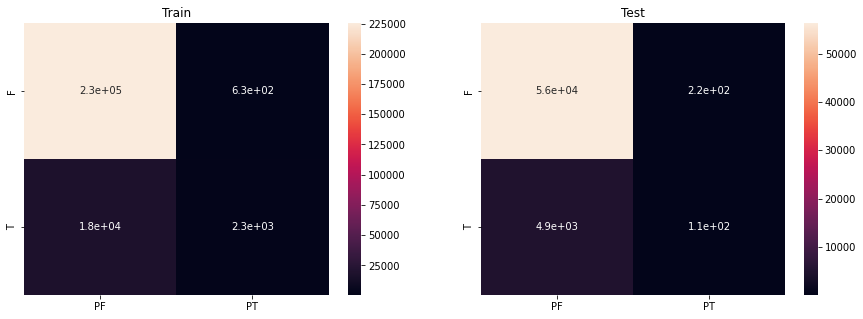

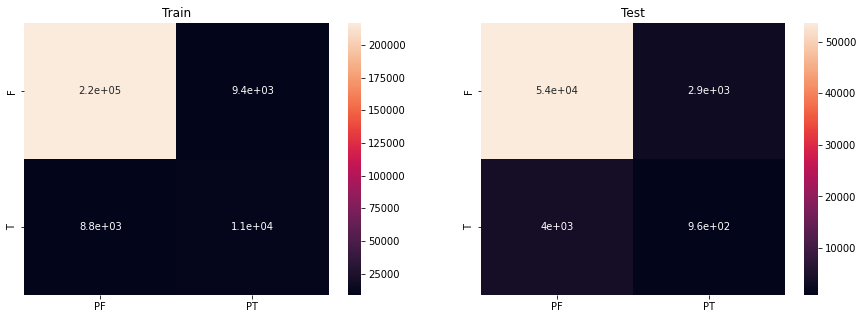

In [264]:
plot_confusion(vote)
plot_confusion(vote_hard)

In [259]:
print_scores(test_target,vote.predict(test_trans))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s


Recall: 0.02175226586102719
Precision: 0.3282674772036474
Accuracy: 0.9174349218737298


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


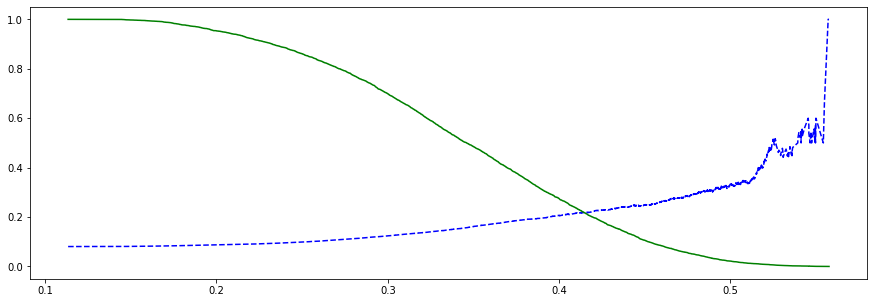

In [260]:
yhat = vote.predict_proba(test_trans)
precision, recall, thresholds = precision_recall_curve(test_target,yhat[:,1])
plot_prec_recall(precision,recall,thresholds)

In [207]:
from sklearn.naive_bayes import GaussianNB

In [213]:
train_trans_sort = data[ind_]
train_target_sort = set_["TARGET"].iloc[ind_]

In [214]:
nb = GaussianNB()
nb.fit(train_trans_sort,train_target_sort)

GaussianNB()

In [198]:
def plot_confusion(model):
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.set_title("Train")
    ax2.set_title("Test")
    sns.heatmap(confusion_matrix(train_target,model.predict(train_trans)),
            xticklabels=["PF","PT"],
            yticklabels=["F","T"],
            annot=True,ax=ax1);
    sns.heatmap(confusion_matrix(test_target,model.predict(test_trans)),
            xticklabels=["PF","PT"],
            yticklabels=["F","T"],
            annot=True,ax=ax2);

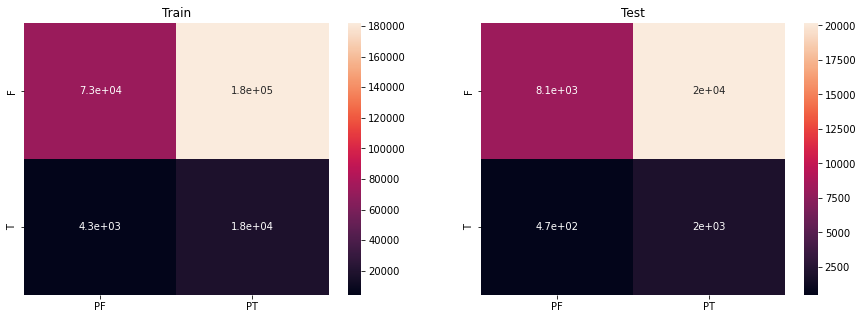

In [215]:
plot_confusion(nb)

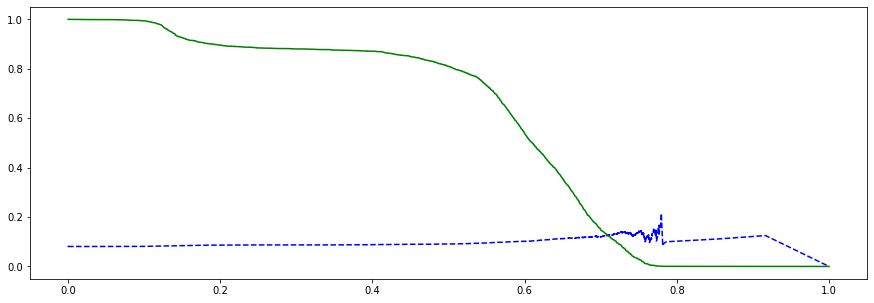

In [216]:
yhat = nb.predict_proba(test_trans)
precision, recall, thresholds = precision_recall_curve(test_target,yhat[:,1])
plot_prec_recall(precision,recall,thresholds)